# Storyline

# Imports, dictionary & loading datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import collections
collections.Iterable = collections.abc.Iterable
from sklearn.decomposition import PCA
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.preprocessing import PolynomialFeatures
from plotly.subplots import make_subplots
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
from ipywidgets import widgets
pyo.init_notebook_mode()
import umap

In [2]:
# matplotlib default colormap
plt.set_cmap('viridis')
# matplotlib color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)

# seaborn colors
sns.set_palette('viridis')  

<Figure size 640x480 with 0 Axes>

In [3]:
# Set display options to show numeric values without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
plt.rcParams.update({
    'font.size': 14,          # Standard-Schriftgröße
    'axes.titlesize': 22,     # Titel-Größe
    'axes.labelsize': 18,     # Achsenbeschriftungsgröße
    'xtick.labelsize': 14,    # Beschriftungsgröße der x-Achse
    'ytick.labelsize': 14     # Beschriftungsgröße der y-Achse
})

In [5]:
ISO3166 = {
    'AD': ['Andorra', 'Andorra'],
    'AE': ['United Arab Emirates', 'Vereinigte Arabische Emirate'],
    'AF': ['Afghanistan', 'Afghanistan'],
    'AG': ['Antigua & Barbuda', 'Antigua und Barbuda'],
    'AI': ['Anguilla', 'Anguilla'],
    'AL': ['Albania', 'Albanien'],
    'AM': ['Armenia', 'Armenien'],
    'AN': ['Netherlands Antilles', 'Niederländische Antillen'],
    'AO': ['Angola', 'Angola'],
    'AQ': ['Antarctica', 'Antarktis'],
    'AR': ['Argentina', 'Argentinien'],
    'AS': ['American Samoa', 'Amerikanisch-Samoa'],
    'AT': ['Austria', 'Österreich'],
    'AU': ['Australia', 'Australien'],
    'AW': ['Aruba', 'Aruba'],
    'AZ': ['Azerbaijan', 'Aserbaidschan'],
    'BA': ['Bosnia and Herzegovina', 'Bosnien und Herzegowina'],
    'BB': ['Barbados', 'Barbados'],
    'BD': ['Bangladesh', 'Bangladesch'],
    'BE': ['Belgium', 'Belgien'],
    'BF': ['Burkina Faso', 'Burkina Faso'],
    'BG': ['Bulgaria', 'Bulgarien'],
    'BH': ['Bahrain', 'Bahrain'],
    'BI': ['Burundi', 'Burundi'],
    'BJ': ['Benin', 'Benin'],
    'BM': ['Bermuda', 'Bermuda'],
    'BN': ['Brunei Darussalam', 'Brunei'],
    'BO': ['Bolivia', 'Bolivien', 'Bolivia (Plurinational State of)'],
    'BR': ['Brazil', 'Brasilien'],
    'BS': ['Bahama', 'Bahamas'],
    'BT': ['Bhutan', 'Bhutan'],
    'BU': ['Burma (no longer exists)', 'Birma (nicht mehr existiert)'],
    'BV': ['Bouvet Island', 'Bouvetinsel'],
    'BW': ['Botswana', 'Botswana'],
    'BY': ['Belarus', 'Weißrussland'],
    'BZ': ['Belize', 'Belize'],
    'CA': ['Canada', 'Kanada'],
    'CC': ['Cocos (Keeling) Islands', 'Kokosinseln'],
    'CF': ['Central African Republic', 'Zentralafrikanische Republik'],
    'CG': ['Congo', 'Kongo','Democratic Republic of the Congo', 'Congo (Brazzaville)', 'Congo (Kinshasa)'],
    'CH': ['Switzerland', 'Schweiz'],
    'CI': ["Côte D'ivoire (Ivory Coast)", 'Elfenbeinküste', 'Ivory Coast', "Côte d'Ivoire"],
    'CK': ['Cook Iislands', 'Cookinseln'],
    'CL': ['Chile', 'Chile'],
    'CM': ['Cameroon', 'Kamerun'],
    'CN': ['China', 'China', 'China, mainland'],
    'CO': ['Colombia', 'Kolumbien'],
    'CR': ['Costa Rica', 'Costa Rica'],
    'CS': ['Serbia', 'Montenegro', 'Serbien', 'Montenegro'],
    'CU': ['Cuba', 'Kuba'],
    'CV': ['Cape Verde', 'Kap Verde'],
    'CX': ['Christmas Island', 'Weihnachtsinsel'],
    'CY': ['Cyprus', 'Zypern'],
    'CZ': ['Czech Republic', 'Czechia', 'Tschechische Republik', 'Tschechien'],
    'DD': ['German Democratic Republic (no longer exists)', 'Deutsche Demokratische Republik (nicht mehr existiert)'],
    'DE': ['Germany', 'Deutschland'],
    'DJ': ['Djibouti', 'Dschibuti'],
    'DK': ['Denmark', 'Dänemark'],
    'DM': ['Dominica', 'Dominica'],
    'DO': ['Dominican Republic', 'Dominikanische Republik'],
    'DZ': ['Algeria', 'Algerien'],
    'EC': ['Ecuador', 'Ecuador'],
    'EE': ['Estonia', 'Estland'],
    'EG': ['Egypt', 'Ägypten'],
    'EH': ['Western Sahara', 'Westsahara'],
    'ER': ['Eritrea', 'Eritrea'],
    'ES': ['Spain', 'Spanien'],
    'ET': ['Ethiopia', 'Äthiopien', 'Ethiopia PDR'],
    'FI': ['Finland', 'Finnland'],
    'FJ': ['Fiji', 'Fidschi'],
    'FK': ['Falkland Islands (Malvinas)', 'Falklandinseln (Malwinen)'],
    'FM': ['Micronesia', 'Mikronesien'],
    'FO': ['Faroe Islands', 'Färöer'],
    'FR': ['France', 'Frankreich'],
    'FX': ['France, Metropolitan', 'Frankreich, Metropolitan'],
    'GA': ['Gabon', 'Gabun'],
    'GB': ['United Kingdom', 'Vereinigtes Königreich'],
    'GD': ['Grenada', 'Grenada'],
    'GE': ['Georgia', 'Georgien'],
    'GF': ['French Guiana', 'Französisch-Guayana'],
    'GH': ['Ghana', 'Ghana'],
    'GI': ['Gibraltar', 'Gibraltar'],
    'GL': ['Greenland', 'Grönland'],
    'GM': ['Gambia', 'Gambia'],
    'GN': ['Guinea', 'Guinea'],
    'GP': ['Guadeloupe', 'Guadeloupe'],
    'GQ': ['Equatorial Guinea', 'Äquatorialguinea'],
    'GR': ['Greece', 'Griechenland'],
    'GS': ['South Georgia and the South Sandwich Islands', 'Südgeorgien und die Südlichen Sandwichinseln'],
    'GT': ['Guatemala', 'Guatemala'],
    'GU': ['Guam', 'Guam'],
    'GW': ['Guinea-Bissau', 'Guinea-Bissau'],
    'GY': ['Guyana', 'Guyana'],
    'HK': ['Hong Kong', 'Hongkong'],
    'HM': ['Heard & McDonald Islands', 'Heard- und McDonald-Inseln'],
    'HN': ['Honduras', 'Honduras'],
    'HR': ['Croatia', 'Kroatien'],
    'HT': ['Haiti', 'Haiti'],
    'HU': ['Hungary', 'Ungarn'],
    'ID': ['Indonesia', 'Indonesien'],
    'IE': ['Ireland', 'Irland'],
    'IL': ['Israel', 'Israel'],
    'IN': ['India', 'Indien'],
    'IO': ['British Indian Ocean Territory', 'Britisches Territorium im Indischen Ozean'],
    'IQ': ['Iraq', 'Irak'],
    'IR': ['Iran (Islamic Republic of)', 'Iran'],
    'IS': ['Iceland', 'Island'],
    'IT': ['Italy', 'Italien'],
    'JM': ['Jamaica', 'Jamaika'],
    'JO': ['Jordan', 'Jordanien'],
    'JP': ['Japan', 'Japan'],
    'KE': ['Kenya', 'Kenia'],
    'KG': ['Kyrgyzstan', 'Kirgisistan'],
    'KH': ['Cambodia', 'Kambodscha'],
    'KI': ['Kiribati', 'Kiribati'],
    'KM': ['Comoros', 'Komoren'],
    'KN': ['St. Kitts and Nevis', 'St. Kitts und Nevis'],
    'KP': ['North Korea', 'Nordkorea', "Democratic People's Republic of Korea"],
    'KR': ['South Korea', 'Südkorea'],
    'KW': ['Kuwait', 'Kuwait'],
    'KY': ['Cayman Islands', 'Kaimaninseln'],
    'KZ': ['Kazakhstan', 'Kasachstan'],
    'LA': ["Lao People's Democratic Republic", 'Laos'],
    'LB': ['Lebanon', 'Libanon'],
    'LC': ['Saint Lucia', 'St. Lucia'],
    'LI': ['Liechtenstein', 'Liechtenstein'],
    'LK': ['Sri Lanka', 'Sri Lanka'],
    'LR': ['Liberia', 'Liberia'],
    'LS': ['Lesotho', 'Lesotho'],
    'LT': ['Lithuania', 'Litauen'],
    'LU': ['Luxembourg', 'Luxemburg'],
    'LV': ['Latvia', 'Lettland'],
    'LY': ['Libya', 'Libyen'],
    'MA': ['Morocco', 'Marokko'],
    'MC': ['Monaco', 'Monaco'],
    'MD': ['Moldova', 'Moldawien', 'Republic of Moldova'],
    'MG': ['Madagascar', 'Madagaskar'],
    'MH': ['Marshall Islands', 'Marshallinseln'],#
    'MK': ['North Macedonia', 'Nordmazedonien'],
    'ML': ['Mali', 'Mali'],
    'MN': ['Mongolia', 'Mongolei'],
    'MM': ['Myanmar', 'Myanmar'],
    'MO': ['Macau', 'Macau'],
    'MP': ['Northern Mariana Islands', 'Nördliche Marianen'],
    'MQ': ['Martinique', 'Martinique'],
    'MR': ['Mauritania', 'Mauretanien'],
    'MS': ['Montserrat', 'Montserrat'],
    'MT': ['Malta', 'Malta'],
    'MU': ['Mauritius', 'Mauritius'],
    'MV': ['Maldives', 'Malediven'],
    'MW': ['Malawi', 'Malawi'],
    'MX': ['Mexico', 'Mexiko'],
    'MY': ['Malaysia', 'Malaysia'],
    'MZ': ['Mozambique', 'Mosambik'],
    'NA': ['Namibia', 'Namibia'],
    'NC': ['New Caledonia', 'Neukaledonien'],
    'NE': ['Niger', 'Niger'],
    'NF': ['Norfolk Island', 'Norfolkinsel'],
    'NG': ['Nigeria', 'Nigeria'],
    'NI': ['Nicaragua', 'Nicaragua'],
    'NL': ['Netherlands', 'Niederlande'],
    'NO': ['Norway', 'Norwegen'],
    'NP': ['Nepal', 'Nepal'],
    'NR': ['Nauru', 'Nauru'],
    'NT': ['Neutral Zone (no longer exists)', 'Neutralzone (existiert nicht mehr)'],
    'NU': ['Niue', 'Niue'],
    'NZ': ['New Zealand', 'Neuseeland'],
    'OM': ['Oman', 'Oman'],
    'PA': ['Panama', 'Panama'],
    'PE': ['Peru', 'Peru'],
    'PF': ['French Polynesia', 'Französisch-Polynesien'],
    'PG': ['Papua New Guinea', 'Papua-Neuguinea'],
    'PH': ['Philippines', 'Philippinen'],
    'PK': ['Pakistan', 'Pakistan'],
    'PL': ['Poland', 'Polen'],
    'PM': ['St. Pierre & Miquelon', 'St. Pierre und Miquelon'],
    'PN': ['Pitcairn', 'Pitcairn'],
    'PS': ['Palestine', 'Palestina', 'State of Palestine'],
    'PR': ['Puerto Rico', 'Puerto Rico'],
    'PT': ['Portugal', 'Portugal'],
    'PW': ['Palau', 'Palau'],
    'PY': ['Paraguay', 'Paraguay'],
    'QA': ['Qatar', 'Katar'],
    'RE': ['Réunion', 'Réunion'],
    'RO': ['Romania', 'Rumänien'],
    'RU': ['Russian Federation', 'Russische Föderation', 'Russia', 'Russland'],
    'RW': ['Rwanda', 'Ruanda'],
    'SA': ['Saudi Arabia', 'Saudi-Arabien'],
    'SB': ['Solomon Islands', 'Salomonen'],
    'SC': ['Seychelles', 'Seychellen'],
    'SD': ['Sudan', 'Sudan', 'Sudan (former)'],
    'SE': ['Sweden', 'Schweden'],
    'SG': ['Singapore', 'Singapur'],
    'SH': ['St. Helena', 'St. Helena'],
    'SI': ['Slovenia', 'Slowenien'],
    'SJ': ['Svalbard & Jan Mayen Islands', 'Svalbard und Jan Mayen'],
    'SK': ['Slovakia', 'Slowakei'],
    'SL': ['Sierra Leone', 'Sierra Leone'],
    'SM': ['San Marino', 'San Marino'],
    'SN': ['Senegal', 'Senegal'],
    'SO': ['Somalia', 'Somalia'],
    'SR': ['Suriname', 'Suriname'],
    'SS': ['South Sudan','Südsudan'],
    'ST': ['Sao Tome & Principe', 'São Tomé und Príncipe'],
    'SU': ['Union of Soviet Socialist Republics (no longer exists)', 'Sowjetunion (existiert nicht mehr)'],
    'SV': ['El Salvador', 'El Salvador'],
    'SY': ['Syrian Arab Republic', 'Syria', 'Syrien'],
    'SZ': ['Swaziland', 'Swasiland', 'Eswatini'],
    'TC': ['Turks & Caicos Islands', 'Turks- und Caicosinseln'],
    'TD': ['Chad', 'Tschad'],
    'TF': ['French Southern Territories', 'Französische Süd- und Antarktisgebiete'],
    'TG': ['Togo', 'Togo'],
    'TH': ['Thailand', 'Thailand'],
    'TJ': ['Tajikistan', 'Tadschikistan'],
    'TK': ['Tokelau', 'Tokelau'],
    'TM': ['Turkmenistan', 'Turkmenistan'],
    'TN': ['Tunisia', 'Tunesien'],
    'TO': ['Tonga', 'Tonga'],
    'TP': ['East Timor', 'Osttimor'],
    'TR': ['Turkey', 'Türkei', 'Turkiye'],
    'TT': ['Trinidad & Tobago', 'Trinidad und Tobago', 'Trinidad and Tobago'],
    'TV': ['Tuvalu', 'Tuvalu'],
    'TW': ['Taiwan, Province of China', 'Taiwan', 'China, Taiwan Province of', 'Taiwan Province of China'],
    'TZ': ['Tanzania, United Republic of', 'Tansania', 'Tanzania', 'United Republic of Tanzania'],
    'UA': ['Ukraine', 'Ukraine'],
    'UG': ['Uganda', 'Uganda'],
    'UK': ['United Kingdom', 'Vereinigtes Königreich'],
    'UM': ['United States Minor Outlying Islands', 'United States Minor Outlying Islands'],
    'US': ['United States of America', 'United States', 'Vereinigte Staaten von Amerika', 'USA'],
    'UY': ['Uruguay', 'Uruguay'],
    'UZ': ['Uzbekistan', 'Usbekistan'],
    'VA': ['Vatican City State (Holy See)', 'Holy See', 'Vatikanstadt'],
    'VC': ['St. Vincent & the Grenadines', 'St. Vincent und die Grenadinen'],
    'VE': ['Venezuela', 'Venezuela'],
    'VG': ['British Virgin Islands', 'Britische Jungferninseln'],
    'VI': ['United States Virgin Islands', 'Amerikanische Jungferninseln'],
    'VN': ['Viet Nam', 'Vietnam'],
    'VU': ['Vanuatu', 'Vanuatu'],
    'WF': ['Wallis & Futuna Islands', 'Wallis und Futuna'],
    'WS': ['Samoa', 'Samoa'],
    'XK': ['Kosovo'],
    'YE': ['Yemen', 'Jemen'],
    'YT': ['Mayotte', 'Mayotte'],
    'YU': ['Yugoslavia', 'Jugoslawien'],
    'ZA': ['South Africa', 'Südafrika'],
    'ZM': ['Zambia', 'Sambia'],
    'ZR': ['Zaire', 'Zaire'],
    'ZW': ['Zimbabwe', 'Simbabwe'],
    'ZZ': ['Unknown or unspecified country', 'Unbekanntes oder nicht spezifiziertes Land'],
}

In [6]:
# reveresed dictionary for country names for renaming
reversed_ISO3166 = {}
for code, names in ISO3166.items():
    country_name = names[0]  # Hier wird der vollständige Ländername ausgewählt
    reversed_ISO3166[country_name] = code

In [7]:
df_happiness = pd.read_csv('./Data/World Happiness Report.csv')

df_death_causes = pd.read_csv('./Data/causes of death till 2019.csv', header=1)

df_internet_users = pd.read_csv('./Data/Internet Users percent of population.csv')

df_population = pd.read_csv('./Data/population.csv')

df_gdp = pd.read_csv('./Data/GDP DATA.csv', header=2)

df_environment = pd.read_csv('./Data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')

df_latitude_longitude = pd.read_csv('./Data/latitude_longitude.csv', encoding='latin1')

In [8]:
# needs to be changed before pre-processing
df_latitude_longitude = df_latitude_longitude.drop(columns='country')
df_latitude_longitude.rename(columns={'name': 'country'}, inplace=True)

# Pre-Processing

## Check usability of data and set naming conventions

In [9]:
# rename columns such that it is possible to use dot access

df_happiness.rename(columns={'Country Name': 'country',
                             'Life Ladder': 'happiness_score',
                             'Freedom To Make Life Choices': 'freedom',
                             'Perceptions Of Corruption': 'perception_corruption',
                             'Log GDP Per Capita': 'log_gdp',
                             'Social Support': 'social_support',
                             'Healthy Life Expectancy At Birth': 'birth_health',
                             'Regional Indicator': 'regional_indicator',
                             'Confidence In National Government': 'government_confidence',
                             'Generosity': 'generosity', 'Year': 'year'}, inplace=True)

In [10]:
dataframes = ['df_happiness', 'df_death_causes', 'df_internet_users', 'df_population', 'df_gdp', 
              'df_environment', 'df_latitude_longitude']

In [11]:
# change different names for "country" to "country" to match dataframes correctly

df_with_country_column = []

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() in ['country', 'country name', 'country/region', 'area']:
            column_name = col
            break
    if column_name is not None:
        # Make a copy of the dataframe slice to avoid SettingWithCopyWarning
        df = df[df[column_name].isin(df_happiness['country'].unique())].copy()
        df.rename(columns={column_name: 'country'}, inplace=True)
        globals()[df_name] = df
        df_with_country_column.append(df_name)

In [12]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_ISO3166 = {}
for key, value in ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_ISO3166[sub_value.lower()] = key
    else:
        flattened_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_ISO3166:
                    df.loc[index, 'country'][i] = flattened_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_ISO3166:
                df.loc[index, 'country'] = flattened_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [13]:
df_happiness

country  regional_indicator  year  happiness_score  log_gdp  \
0         AF          South Asia  2008             3.72     7.35   
1         AF          South Asia  2009             4.40     7.51   
2         AF          South Asia  2010             4.76     7.61   
3         AF          South Asia  2011             3.83     7.58   
4         AF          South Asia  2012             3.78     7.66   
...      ...                 ...   ...              ...      ...   
2194      ZW  Sub-Saharan Africa  2018             3.62     7.78   
2195      ZW  Sub-Saharan Africa  2019             2.69     7.70   
2196      ZW  Sub-Saharan Africa  2020             3.16     7.60   
2197      ZW  Sub-Saharan Africa  2021             3.15     7.66   
2198      ZW  Sub-Saharan Africa  2022             3.30     7.67   

      social_support  birth_health  freedom  generosity  \
0               0.45         50.50     0.72        0.17   
1               0.55         50.80     0.68        0.19   
2               0.54         51.10     0.60        0.12   
3               0.52         51.40     0.50        0.16   
4               0.52         51.70     0.53        0.24   
...              ...           ...      ...         ...   
2194            0.78         52.62     0.76       -0.05   
2195            0.76         53.10     0.63       -0.05   
2196            0.72         53.58     0.64        0.01   
2197            0.69         54.05     0.67       -0.08   
2198            0.67         54.53     0.65       -0.07   

      perception_corruption  Positive Affect  Negative Affect  \
0                      0.88             0.41             0.26   
1                      0.85             0.48             0.24   
2                      0.71             0.52             0.28   
3                      0.73             0.48             0.27   
4                      0.78             0.61             0.27   
...                     ...              ...              ...   
2194                   0.84             0.66             0.21   
2195                   0.83             0.66             0.24   
2196                   0.79             0.66             0.35   
2197                   0.76             0.61             0.24   
2198                   0.75             0.64             0.19   

      government_confidence  
0                      0.61  
1                      0.61  
2                      0.30  
3                      0.31  
4                      0.44  
...                     ...  
2194                   0.55  
2195                   0.46  
2196                   0.58  
2197                   0.67  
2198                    NaN  

[2199 rows x 13 columns]

In [14]:
# reverse country encoding but to just one uniform naming convention

# Flatten the ISO3166 dictionary to handle lists in values
flattened_reversed_ISO3166 = {}
for key, value in reversed_ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_reversed_ISO3166[sub_value.lower()] = key
    else:
        flattened_reversed_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_reversed_ISO3166:
                    df.loc[index, 'country'][i] = flattened_reversed_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_reversed_ISO3166:
                df.loc[index, 'country'] = flattened_reversed_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    unknown_countries.add(country)
    globals()[df_name] = df

In [15]:
# identify the countries that exist in all the data sets

common_countries = set(df_happiness['country'].unique())

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() == 'country' or col.lower() == 'country name':
            column_name = col
            break
    if column_name is not None:
        countries = set(df[column_name].unique())
        common_countries = common_countries.intersection(countries)

common_countries_list = ", ".join(sorted(common_countries))

print("Common Countries:", common_countries_list)
print()
print("These countries appear in all datasets.")

Common Countries: Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belarus, Belgium, Belize, Benin, Bhutan, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Costa Rica, Croatia, Cuba, Cyprus, Denmark, Djibouti, Dominican Republic, Ecuador, El Salvador, Estonia, Ethiopia, Finland, France, Gabon, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kuwait, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Madagascar, Malawi, Malaysia, Maldives, Mali, Malta, Mauritania, Mauritius, Mexico, Mongolia, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, 

## Clean happiness dataset

In [16]:
# Countries with data that starts late or ends early get removed

# Gruppiere den DataFrame nach 'country' und ermittele den kleinsten und größten Wert von 'year'
year_range = df_happiness.groupby('country')['year'].agg(['min', 'max'])

# Extrahiere Länder, die die Bedingungen erfüllen
countries_to_remove = year_range[(year_range['min'] > 2006) | (year_range['max'] < 2018)].index

# Entferne die betroffenen Länder aus dem DataFrame
df_happiness = df_happiness[~df_happiness['country'].isin(countries_to_remove)]

In [17]:
# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_happiness.groupby('country')['year'].min()
latest_years = df_happiness.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_happiness['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_happiness = df_all_combinations.merge(df_happiness, on=['country', 'year'], how='left')

columns_to_fill = [
    'happiness_score', 'log_gdp', 'social_support', 'birth_health', 
    'freedom', 'generosity', 'perception_corruption', 'Positive Affect', 
    'Negative Affect', 'government_confidence'
]

for i in range(1, len(df_happiness)):
    for column in columns_to_fill:
        if pd.isna(df_happiness[column][i]):
            df_happiness.loc[i, column] = df_happiness.loc[i-1, column]

df_happiness.head()

country  year           regional_indicator  happiness_score  log_gdp  \
0  Argentina  2006  Latin America and Caribbean             6.31     9.94   
1  Argentina  2007  Latin America and Caribbean             6.07    10.01   
2  Argentina  2008  Latin America and Caribbean             5.96    10.04   
3  Argentina  2009  Latin America and Caribbean             6.42     9.97   
4  Argentina  2010  Latin America and Caribbean             6.44    10.07   

   social_support  birth_health  freedom  generosity  perception_corruption  \
0            0.94         65.82     0.73       -0.16                   0.85   
1            0.86         65.94     0.65       -0.14                   0.88   
2            0.89         66.06     0.68       -0.13                   0.86   
3            0.92         66.18     0.64       -0.13                   0.88   
4            0.93         66.30     0.73       -0.13                   0.85   

   Positive Affect  Negative Affect  government_confidence  
0             0.75             0.33                   0.52  
1             0.75             0.28                   0.41  
2             0.72             0.32                   0.29  
3             0.76             0.24                   0.27  
4             0.77             0.21                   0.35

In [18]:
# Gruppiere den DataFrame nach 'country' und ermittele den kleinsten und größten Wert von 'year'
year_range = df_happiness.groupby('country')['year'].agg(['min', 'max'])

year_range

min   max
country               
Argentina   2006  2022
Armenia     2006  2022
Australia   2005  2022
Austria     2006  2022
Azerbaijan  2006  2019
...          ...   ...
Uzbekistan  2006  2022
Venezuela   2005  2022
Viet Nam    2006  2022
Zambia      2006  2021
Zimbabwe    2006  2022

[111 rows x 2 columns]

In [19]:
# Dictionary zur Zuordnung der Länder zu Regionen (Englische Regionennamen verwenden)
country_to_region = {
    'Argentina': 'South America',
    'Armenia': 'Europe',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Europe',
    'Bangladesh': 'Asia',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Benin': 'Africa',
    'Bolivia': 'South America',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Burkina Faso': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Costa Rica': 'North America',
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hong Kong S.A.R. of China': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lithuania': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Mali': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Mozambique': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Palestine': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Taiwan, Province of China': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania, United Republic of': 'Africa',
    'Thailand': 'Asia',
    'Togo': 'Africa',
    'Turkey': 'Asia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States of America': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Venezuela': 'South America',
    'Viet Nam': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Aktualisiere die Spalte "regional_indicator" basierend auf dem Dictionary
df_happiness['regional_indicator'] = df_happiness['country'].map(country_to_region)

## Clean additional datasets

In [20]:
# clean internet user data

df_internet_users_clean = df_internet_users.drop(['Country Code'], axis=1)
df_internet_users_clean = df_internet_users_clean.melt(id_vars=['country'], var_name='year', value_name='percent_internet_users')
df_internet_users_clean = df_internet_users_clean.groupby(['country', 'year']).mean().reset_index()
df_internet_users_clean['year'] = df_internet_users_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_internet_users_clean.groupby('country')['year'].min()
latest_years = df_internet_users_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_internet_users_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_internet_users_clean = df_all_combinations.merge(df_internet_users_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_internet_users_clean)):
    if pd.isna(df_internet_users_clean['percent_internet_users'][i]):
        columns_to_fill = ['percent_internet_users']
        df_internet_users_clean.loc[i, columns_to_fill] = df_internet_users_clean.loc[i-1, columns_to_fill]

df_internet_users_clean.head()

country  year  percent_internet_users
0  Afghanistan  1990                    0.00
1  Afghanistan  1991                    0.00
2  Afghanistan  1992                    0.00
3  Afghanistan  1993                    0.00
4  Afghanistan  1994                    0.00

In [21]:
# clean gdp data

df_gdp_clean = df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
df_gdp_clean = df_gdp_clean.melt(id_vars=['country'], var_name='year', value_name='gdp')
df_gdp_clean = df_gdp_clean.dropna()
df_gdp_clean['gdp'] = df_gdp_clean['gdp'].str.replace(',', '').astype(float)
df_gdp_clean = df_gdp_clean.groupby(['country', 'year']).mean().reset_index()
df_gdp_clean['year'] = df_gdp_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_gdp_clean.groupby('country')['year'].min()
latest_years = df_gdp_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_gdp_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_gdp_clean = df_all_combinations.merge(df_gdp_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_gdp_clean)):
    if pd.isna(df_gdp_clean['gdp'][i]):
        columns_to_fill = ['gdp']
        df_gdp_clean.loc[i, columns_to_fill] = df_gdp_clean.loc[i-1, columns_to_fill]
    

df_gdp_clean.head()

country  year          gdp
0  Afghanistan  1960 537777811.00
1  Afghanistan  1961 548888896.00
2  Afghanistan  1962 546666678.00
3  Afghanistan  1963 751111191.00
4  Afghanistan  1964 800000044.00

In [22]:
# clean population data

specified_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
df_population.rename(columns=lambda x: x.split()[0] if x in specified_columns else x, inplace=True)

df_population_clean = df_population[['country', '2022', '2020', '2015', '2010', '2000', 'Area (km²)']]

df_population_clean = df_population_clean.melt(id_vars=['country', 'Area (km²)'], var_name='year', value_name='population')
df_population_clean['year'] = df_population_clean['year'].astype(int)
df_population_clean['population density'] = df_population_clean['population'] / df_population_clean['Area (km²)']

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_population_clean = df_population_clean.sort_values(by=['country', 'year'], ascending=[True, True])

# join latitude and longitude data
df_population_clean = df_population_clean.merge(df_latitude_longitude, on='country', how='inner')
df_population_clean = df_population_clean.reset_index(drop=True)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_population_clean.groupby('country')['year'].min()
latest_years = df_population_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_population_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_population_clean = df_all_combinations.merge(df_population_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_population_clean)):
    if pd.isna(df_population_clean['population'][i]):
        columns_to_fill = ['Area (km²)', 'population', 'population density', 'latitude', 'longitude']
        df_population_clean.loc[i, columns_to_fill] = df_population_clean.loc[i-1, columns_to_fill]

df_population_clean.head()

country  year  Area (km²)  population  population density  latitude  \
0  Afghanistan  2000   652230.00 19542982.00               29.96     33.94   
1  Afghanistan  2001   652230.00 19542982.00               29.96     33.94   
2  Afghanistan  2002   652230.00 19542982.00               29.96     33.94   
3  Afghanistan  2003   652230.00 19542982.00               29.96     33.94   
4  Afghanistan  2004   652230.00 19542982.00               29.96     33.94   

   longitude  
0      67.71  
1      67.71  
2      67.71  
3      67.71  
4      67.71

In [23]:
# clean death causes data

df_death_causes_clean = df_death_causes.rename(columns={'Year': 'year', 'Both sexes': 'Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Both sexes.1': 'Suicides per 100000 (all)'})

columns_to_remove = ["Male", "Female", "Male.1", "Female.1"]
df_death_causes_clean = df_death_causes_clean.drop(columns=columns_to_remove)

for column in df_death_causes_clean.columns[2:]:
    df_death_causes_clean[column] = df_death_causes_clean[column].str.split('[').str[0].str.strip()
    
# Sort the dataframe by 'country' and 'year' columns in ascending order
df_death_causes_clean = df_death_causes_clean.sort_values(by=['country', 'year'], ascending=[True, True])
df_death_causes_clean = df_death_causes_clean.reset_index(drop=True)

# Convert objects to float
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'].astype(float)
df_death_causes_clean['Suicides per 100000 (all)'] = df_death_causes_clean['Suicides per 100000 (all)'].astype(float)
    
# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_death_causes_clean.groupby('country')['year'].min()
latest_years = df_death_causes_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_death_causes_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_death_causes_clean = df_all_combinations.merge(df_death_causes_clean, on=['country', 'year'], how='left')

columns_to_fill = [
    'Probability (%) of dying between age 30 and exact age 70 from illness (all)',
    'Suicides per 100000 (all)',
]

for i in range(1, len(df_death_causes_clean)):
    for column in columns_to_fill:
        if pd.isna(df_death_causes_clean[column][i]):
            df_death_causes_clean.loc[i, column] = df_death_causes_clean.loc[i-1, column]

df_death_causes_clean.head()

country  year  \
0  Afghanistan  2000   
1  Afghanistan  2001   
2  Afghanistan  2002   
3  Afghanistan  2003   
4  Afghanistan  2004   

   Probability (%) of dying between age 30 and exact age 70 from illness (all)  \
0                                              41.70                             
1                                              42.10                             
2                                              42.10                             
3                                              41.50                             
4                                              41.40                             

   Suicides per 100000 (all)  
0                       4.90  
1                       5.00  
2                       5.00  
3                       5.00  
4                       5.00

In [24]:
# clean environmental data
df_environment_clean = df_environment[df_environment['Element'] == "Temperature change"]
df_environment_clean = df_environment_clean.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1)
df_environment_clean = df_environment_clean.rename(columns=lambda x: x.replace('Y', ''))
df_environment_clean.rename(columns={'Area': 'country'}, inplace=True)
df_with_country_column.append('df_environment_clean')
df_environment_clean.head()

# Transpose the columns int rows using melt
df_environment_clean = df_environment_clean.melt(id_vars=['country', 'Months'], var_name='year', value_name='temperature_change')

# Rearrange the columns in the desired order'
df_environment_clean = df_environment_clean[['country', 'Months', 'year', 'temperature_change']]

# Group by country and year, calculate mean, and drop Months column
df_environment_clean = df_environment_clean.drop(['Months'], axis=1)
df_environment_clean = df_environment_clean.groupby(['country', 'year']).mean().reset_index()
df_environment_clean['year'] = df_environment_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_environment_clean.groupby('country')['year'].min()
latest_years = df_environment_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_environment_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_environment_clean = df_all_combinations.merge(df_environment_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_environment_clean)):
    if pd.isna(df_environment_clean['temperature_change'][i]):
        columns_to_fill = ['temperature_change']
        df_environment_clean.loc[i, columns_to_fill] = df_environment_clean.loc[i-1, columns_to_fill]

df_environment_clean.head()

country  year  temperature_change
0  Afghanistan  1961                0.03
1  Afghanistan  1962               -0.20
2  Afghanistan  1963                0.89
3  Afghanistan  1964               -0.91
4  Afghanistan  1965               -0.05

# Combine data frames

In [25]:
dataframes = [df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_environment_clean]

In [26]:
# set equal timeframe for dataframes based on the time frame of df_happiness

# filter years from 2005 to 2018 since thats the times frame covered by all dataframes
filtered_dataframes = []
for df in dataframes:
    filtered_df = df[(df['year'] >= 2006) & (df['year'] <= 2018)]
    filtered_dataframes.append(filtered_df)

# reset index
for idx, df in enumerate(filtered_dataframes):
    filtered_dataframes[idx] = df.reset_index(drop=True)

df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_environment_clean = filtered_dataframes

In [27]:
dataframes = [df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_environment_clean]

new_dataframes = []

new_names = ['df_death_causes_combined', 'df_internet_users_combined', 'df_population_combined', 'df_gdp_combined', 'df_environment_combined']

for df, new_name in zip(dataframes, new_names):
    new_df = pd.merge(df, df_happiness[['year', 'country', 'regional_indicator', 'happiness_score', 'social_support', 'birth_health', 'freedom', 'generosity', 'perception_corruption', 'government_confidence']], on=["year", "country"], how="inner")
    new_dataframes.append(new_df)
    globals()[new_name] = new_df

# Access the new DataFrames
# df_death_causes_combined, df_divorce_rate_combined, df_internet_users_combined, and so on...

In [28]:
# merge population to calculate gdp per person
df_gdp_combined = df_gdp_combined.merge(df_population_combined[['country', 'year', 'population']], on=['year', 'country'], how='inner')
df_gdp_combined['GDP_per_person'] = round(df_gdp_combined['gdp'] / df_gdp_combined['population'],0)
df_gdp_combined['gdp_per_person_log'] = np.log(df_gdp_combined['GDP_per_person'])
df_gdp_combined = df_gdp_combined.drop(['population'], axis = 1)# find the index of the dataframe with the name 'df_gdp_combined' in new_dataframes
gdp_index = new_names.index('df_gdp_combined')

# update the respective dataframe in the list
new_dataframes[gdp_index] = df_gdp_combined

In [29]:
all_dataframes_combined = df_death_causes_combined

for df in new_dataframes[1:]:
    all_dataframes_combined = pd.merge(all_dataframes_combined, df, on=['year', 'country', 'regional_indicator', 'happiness_score', 'social_support', 'birth_health', 'freedom', 'generosity', 'perception_corruption', 'government_confidence'], how= "inner")
    
all_dataframes_combined.dropna(inplace=True)
all_dataframes_combined = all_dataframes_combined.reset_index(drop=True)
all_dataframes_combined.head()

country  year  \
0  Argentina  2006   
1  Argentina  2007   
2  Argentina  2008   
3  Argentina  2009   
4  Argentina  2010   

   Probability (%) of dying between age 30 and exact age 70 from illness (all)  \
0                                              18.30                             
1                                              18.80                             
2                                              18.00                             
3                                              17.80                             
4                                              17.80                             

   Suicides per 100000 (all) regional_indicator  happiness_score  \
0                       8.60      South America             6.31   
1                       8.30      South America             6.07   
2                       8.70      South America             5.96   
3                       8.40      South America             6.42   
4                       8.60      South America             6.44   

   social_support  birth_health  freedom  generosity  ...  \
0            0.94         65.82     0.73       -0.16  ...   
1            0.86         65.94     0.65       -0.14  ...   
2            0.89         66.06     0.68       -0.13  ...   
3            0.92         66.18     0.64       -0.13  ...   
4            0.93         66.30     0.73       -0.13  ...   

   percent_internet_users  Area (km²)  population  population density  \
0                   20.93  2780400.00 37070774.00               13.33   
1                   25.95  2780400.00 37070774.00               13.33   
2                   28.11  2780400.00 37070774.00               13.33   
3                   34.00  2780400.00 37070774.00               13.33   
4                   45.00  2780400.00 41100123.00               14.78   

   latitude  longitude             gdp  GDP_per_person  gdp_per_person_log  \
0    -38.42     -63.62 232557260817.00         6273.00                8.74   
1    -38.42     -63.62 287530508431.00         7756.00                8.96   
2    -38.42     -63.62 361558037110.00         9753.00                9.19   
3    -38.42     -63.62 332976484578.00         8982.00                9.10   
4    -38.42     -63.62 423627422092.00        10307.00                9.24   

   temperature_change  
0                0.58  
1               -0.25  
2                0.57  
3                0.71  
4                0.12  

[5 rows x 22 columns]

In [30]:
all_dataframes_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 22 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   country                                                                      1196 non-null   object 
 1   year                                                                         1196 non-null   int64  
 2   Probability (%) of dying between age 30 and exact age 70 from illness (all)  1196 non-null   float64
 3   Suicides per 100000 (all)                                                    1196 non-null   float64
 4   regional_indicator                                                           1196 non-null   object 
 5   happiness_score                                                              1196 non-null   float64
 6   social_support                          

In [31]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from jupyter_dash import JupyterDash
from plotly.subplots import make_subplots

heatmap_colorscale = [
    [-1, "blue"],    # Blue for the most negative values
    [0, "white"],    # White for zero
    [1, "red"]       # Red for the most positive values
]


external_stylesheets = [dbc.themes.BOOTSTRAP]

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

metrics_ranges = {
    'happiness_score': [0, 10.1],
    'Probability (%) of dying between age 30 and exact age 70 from illness (all)': [0, 1.1*all_dataframes_combined['Probability (%) of dying between age 30 and exact age 70 from illness (all)'].max()],
    'Suicides per 100000 (all)': [0, 1.1*all_dataframes_combined['Suicides per 100000 (all)'].max()],
    'GDP_per_person': [0, 1.1*all_dataframes_combined['GDP_per_person'].max()],
    'social_support': [0, 1.1*all_dataframes_combined['social_support'].max()],
    'perception_corruption': [0, 1.1*all_dataframes_combined['perception_corruption'].max()],
    'temperature_change': [all_dataframes_combined['temperature_change'].min()-1, 1.1*all_dataframes_combined['temperature_change'].max()],
    'freedom': [0, 1.1*all_dataframes_combined['freedom'].max()],
    'percent_internet_users': [0, 1.1*all_dataframes_combined['percent_internet_users'].max()],
}

app.layout = html.Div([
    html.H1("Detailed Country Analysis"),
    html.Hr(),

    dbc.Row([
        dbc.Col([
            html.Label("Select First Country:"),
            dcc.Dropdown(
                id='country1-dropdown',
                options=[{'label': country, 'value': country} for country in all_dataframes_combined['country'].unique()],
                value='Argentina',
                multi=False
            )
        ], width=4),
        dbc.Col([
            html.Label("Select Second Country:"),
            dcc.Dropdown(
                id='country2-dropdown',
                options=[{'label': 'None', 'value': 'None'}] + [{'label': country, 'value': country} for country in all_dataframes_combined['country'].unique()],
                value='None',
                multi=False
)
        ], width=4)
    ]),
    html.Br(),

    dcc.Tabs([
        dcc.Tab(label='Happiness', children=[
            dcc.Graph(id='time-series-happiness')
        ]),
        dcc.Tab(label='Health', children=[
            dcc.Graph(id='time-series-health')
        ]),
        dcc.Tab(label='Suicide', children=[
            dcc.Graph(id='time-series-suicides')
        ]),
        dcc.Tab(label='Economic', children=[
            dcc.Graph(id='time-series-GDP')
        ]),
        dcc.Tab(label='Freedom', children=[
            dcc.Graph(id='time-series-freedom')
        ]),
        dcc.Tab(label='Internet Users', children=[
            dcc.Graph(id='time-series-internet-users')
        ]),
        dcc.Tab(label='Social Support', children=[
            dcc.Graph(id='time-series-social-support')
        ]),
        dcc.Tab(label='Perception Corruption', children=[
            dcc.Graph(id='time-series-perception-corruption')
        ]),
        dcc.Tab(label='Temperature Change', children=[
            dcc.Graph(id='time-series-temperature-change')
        ]),
        dcc.Tab(label='Correlation Matrix', children=[
            dcc.Graph(id='correlation-matrix')
        ]),
    ])
])

def create_connected_scatter(df1, df2, x_col, y_col, title):
    traces = []
    if df1 is not None:
        traces.extend([
            go.Scatter(x=df1[x_col], y=df1[y_col], mode='lines', name=f"{df1['country'].iloc[0]}", line=dict(color='#4c78a8')),
            go.Scatter(x=df1[x_col], y=df1[y_col], mode='markers', marker=dict(color='#db2b00'), name=f"trace for {df1['country'].iloc[0]}")
        ])
    if df2 is not None:
        traces.extend([
            go.Scatter(x=df2[x_col], y=df2[y_col], mode='lines', name=f"{df2['country'].iloc[0]}", line=dict(color='#e45756')),
            go.Scatter(x=df2[x_col], y=df2[y_col], mode='markers', marker=dict(color='#0700db'), name=f"trace for {df2['country'].iloc[0]}")  # I believe you made a typo here; it should be df2 instead of df1
        ])
    
    fig = go.Figure(data=traces)
    
    fig.update_layout(
        title=title,
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=True, zeroline=False, gridcolor='#D3D3D3'),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)'
    )
    
    return fig

@app.callback(
    Output('time-series-happiness', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_happiness(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Happiness Score Over Time'
    metric = 'happiness_score'
    fig = create_connected_scatter(df1, df2, 'year', 'happiness_score', title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="happiness score")
    return fig

@app.callback(
    Output('time-series-health', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_health(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Health Over Time'
    metric = 'Probability (%) of dying between age 30 and exact age 70 from illness (all)'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="Probability of dying between age 30 and 70 from illness (%)")
    return fig

@app.callback(
    Output('time-series-suicides', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_suicides(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Suicides Over Time'
    metric = 'Suicides per 100000 (all)'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="Suicides per 100000")
    return fig

@app.callback(
    Output('time-series-GDP', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_GDP(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'GDP per Person Over Time'
    metric = 'GDP_per_person'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="GDP per capita")
    return fig

@app.callback(
    Output('time-series-social-support', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_social_support(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Social Support Over Time'
    metric = 'social_support'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="social support index")
    return fig

@app.callback(
    Output('time-series-perception-corruption', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_perception_corruption(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Perception of Corruption Over Time'
    metric = 'perception_corruption'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="corruption perception index")
    return fig

@app.callback(
    Output('time-series-temperature-change', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_temperature_change(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Temperature Change Over Time'
    metric = 'temperature_change'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="temperature change (°C)")
    return fig

@app.callback(
    Output('correlation-matrix', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_correlation_matrix(selected_country1, selected_country2):
    selected_features = ['happiness_score', 'social_support', 'freedom', 'percent_internet_users', 'population', 'perception_corruption', 'GDP_per_person', 'temperature_change']

    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1][selected_features] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2][selected_features] if selected_country2 != 'None' else None

    rows = 1
    cols = 2 if df1 is not None and df2 is not None else 1

    subplot_titles = []
    if df1 is not None and not df1.empty:
        subplot_titles.append(selected_country1)
    if df2 is not None and not df2.empty:
        subplot_titles.append(selected_country2)

    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles, shared_xaxes=True, shared_yaxes=True)

    if df1 is not None and not df1.empty:
        correlation1 = df1.corr()
        heatmap1 = go.Heatmap(z=correlation1, x=correlation1.columns, y=correlation1.columns, colorscale='RdBu', showscale=True, zmid=0)
        fig.add_trace(heatmap1, row=1, col=1)

    if df2 is not None and not df2.empty:
        correlation2 = df2.corr()
        heatmap2 = go.Heatmap(z=correlation2, x=correlation2.columns, y=correlation2.columns, colorscale='RdBu', showscale=False, zmid=0)
        fig.add_trace(heatmap2, row=1, col=2)

    fig.update_layout(title='Correlation Matrix')
    return fig


@app.callback(
    Output('time-series-freedom', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_freedom(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Freedom Over Time'
    metric = 'freedom'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="freedom index")
    return fig

@app.callback(
    Output('time-series-internet-users', 'figure'),
    [Input('country1-dropdown', 'value'),
     Input('country2-dropdown', 'value')]
)
def update_time_series_internet_users(selected_country1, selected_country2):
    df1 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country1] if selected_country1 != 'None' else None
    df2 = all_dataframes_combined[all_dataframes_combined['country'] == selected_country2] if selected_country2 != 'None' else None

    title = 'Internet Users Over Time'
    metric = 'percent_internet_users'
    fig = create_connected_scatter(df1, df2, 'year', metric, title)
    fig.update_yaxes(range=metrics_ranges[metric])
    fig.update_layout(xaxis_title="Year", yaxis_title="internet users (%)")
    return fig


app.run_server(debug=True, mode='inline', port=8051)

# Correlations to happiness - Scatterplots

## Apparent interconnections

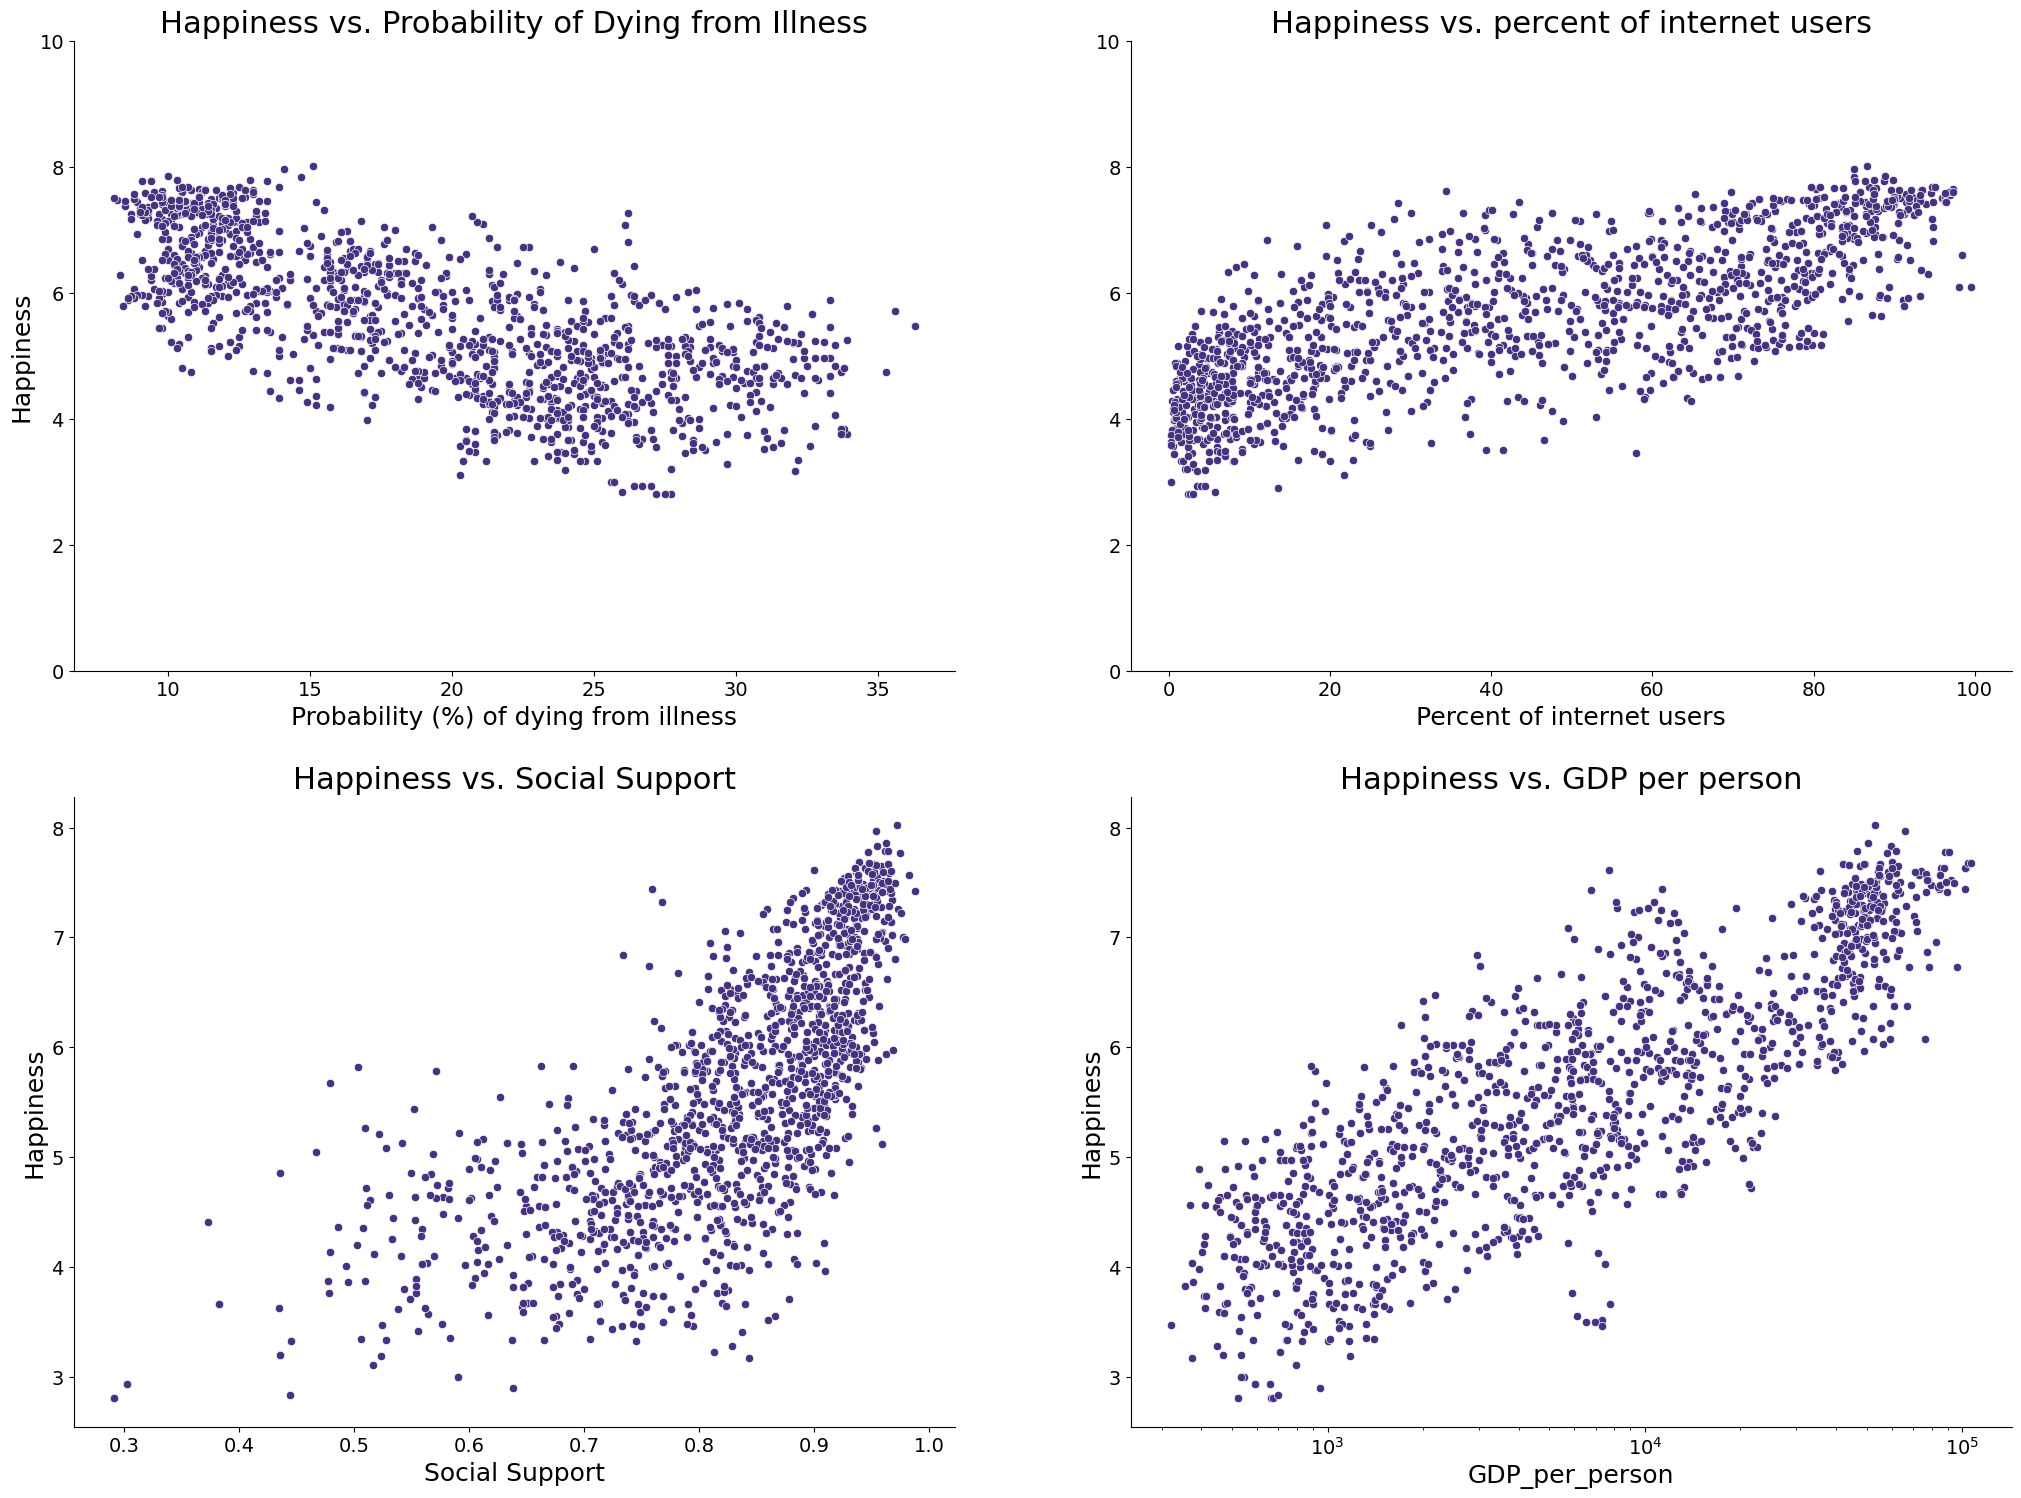

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 18))

# Erste Grafik (linke obere Position)
ax1 = sns.scatterplot(data=df_death_causes_combined, x="Probability (%) of dying between age 30 and exact age 70 from illness (all)", y="happiness_score", ax=axs[0, 0])

# Formatierung für die erste Grafik anpassen
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Probability (%) of dying from illness')
ax1.set_ylabel('Happiness')
ax1.set_ylim(0,10)
ax1.set_title('Happiness vs. Probability of Dying from Illness')

# Zweite Grafik (mittlere obere Position)
ax2 = sns.scatterplot(data=df_internet_users_combined, x="percent_internet_users", y="happiness_score", ax=axs[0, 1])

# Formatierung für die zweite Grafik anpassen
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Percent of internet users')
ax2.set_ylabel('')
ax2.set_ylim(0,10)
ax2.set_title('Happiness vs. percent of internet users')

# Dritte Grafik (rechte obere Position)
ax3 = sns.scatterplot(data=df_gdp_combined, x="GDP_per_person", y="happiness_score", ax=axs[1, 1])

# Formatierung für die dritte Grafik anpassen
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xscale('log')
ax3.set_xlabel('GDP_per_person')
ax3.set_ylabel('Happiness')
ax3.set_title('Happiness vs. GDP per person')

# Vierte Grafik (linke untere Position)
ax4 = sns.scatterplot(data=df_happiness, x="social_support", y="happiness_score", ax=axs[1, 0])

# Formatierung für die vierte Grafik anpassen
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('Social Support')
ax4.set_ylabel('Happiness')
ax4.set_title('Happiness vs. Social Support')

plt.show()

## No apparent interconnections

### Freedom

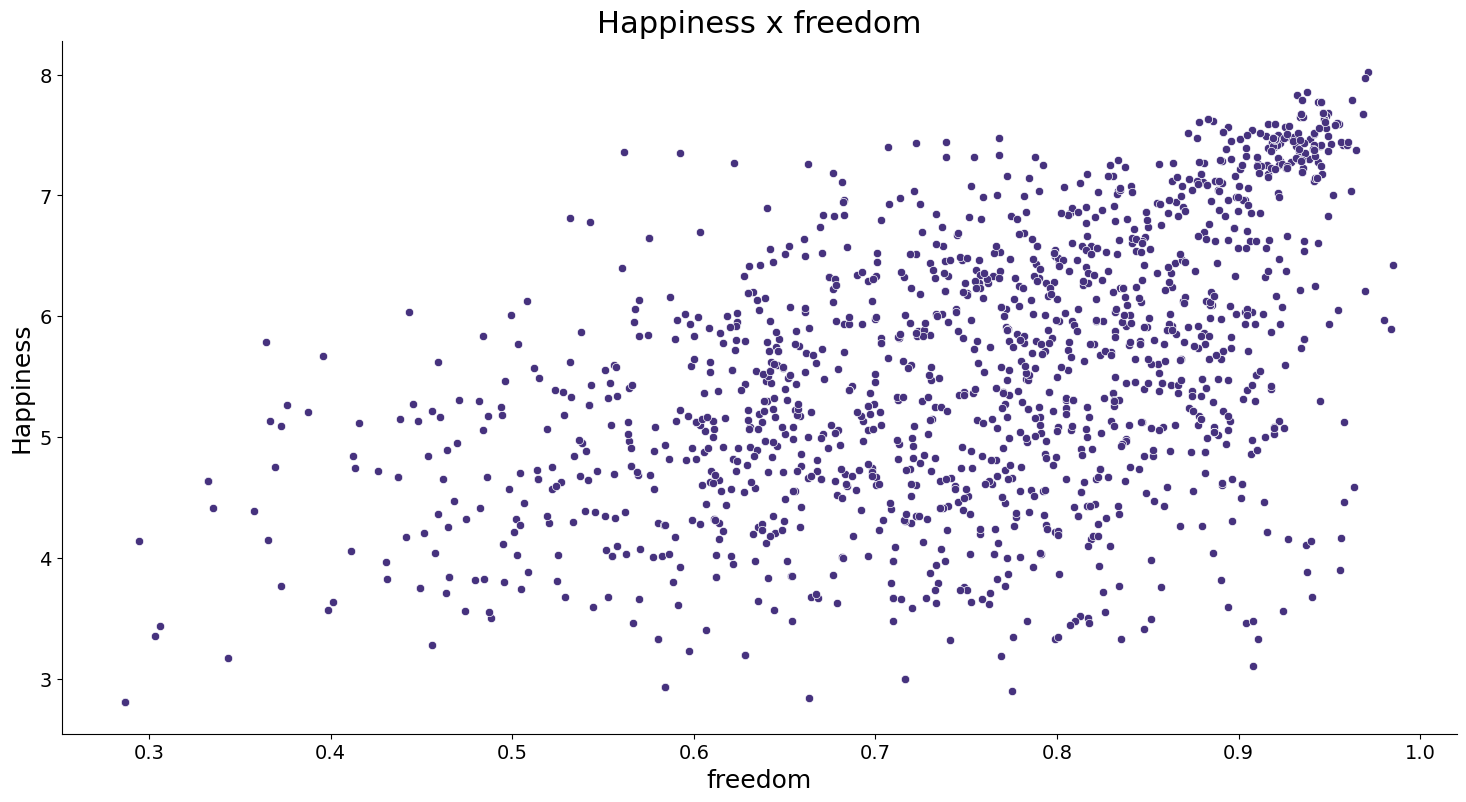

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_happiness, x="freedom", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('freedom')
plt.ylabel('Happiness')

plt.title('Happiness x freedom')
plt.show()

### Generosity

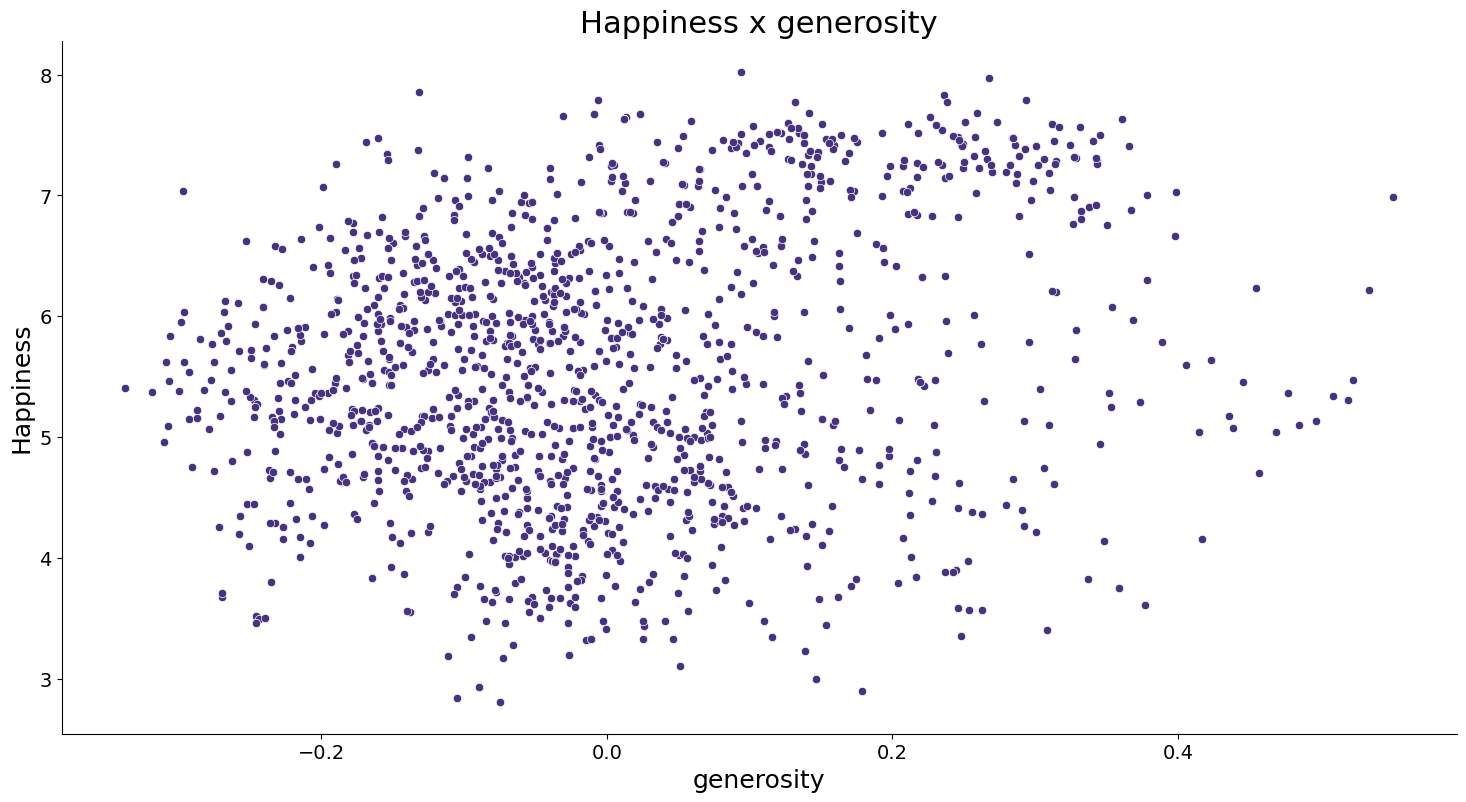

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_happiness, x="generosity", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('generosity')
plt.ylabel('Happiness')

plt.title('Happiness x generosity')
plt.show()

### Population and country data

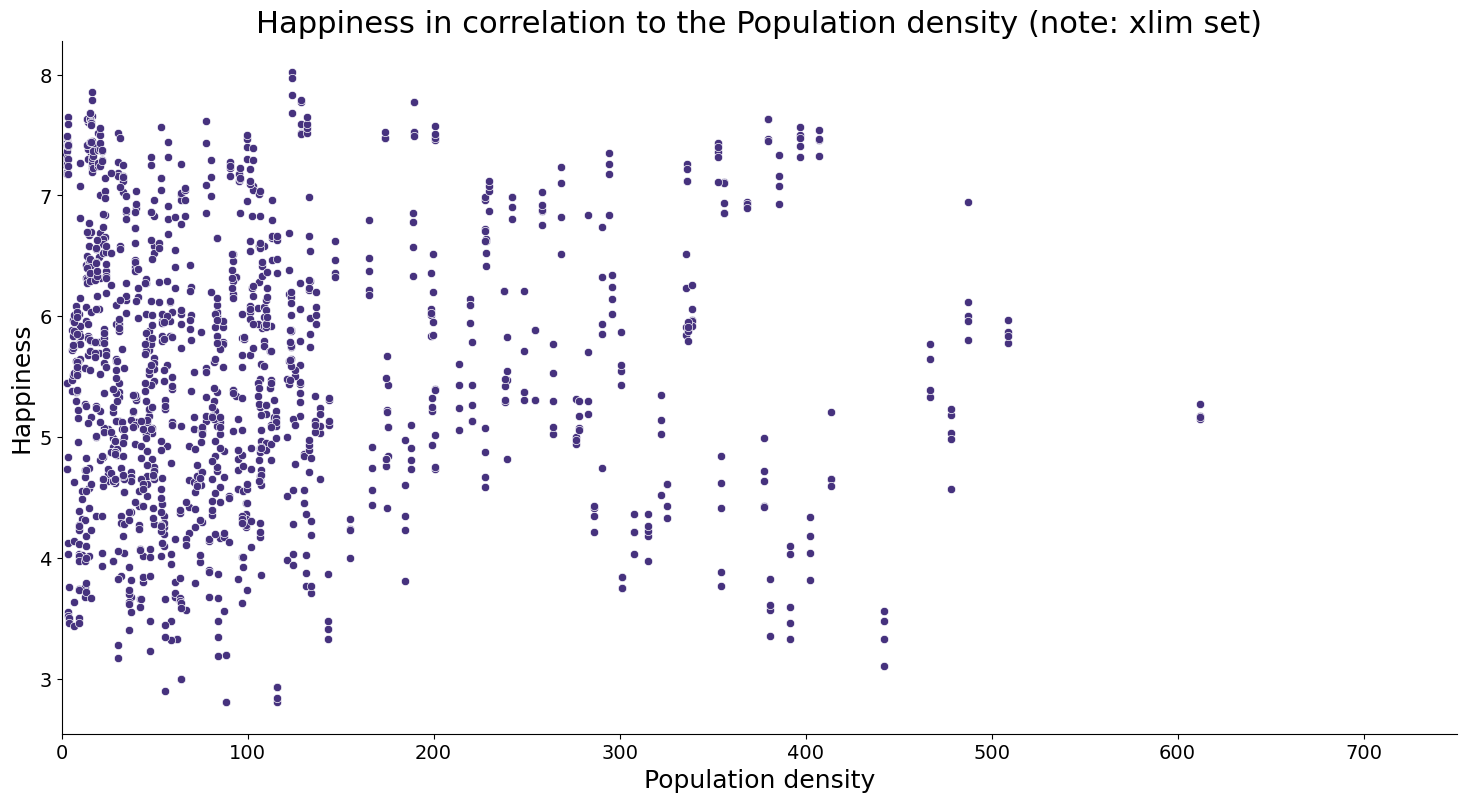

In [35]:
# Population density
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_population_combined, x="population density", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 750)

plt.xlabel('Population density')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Population density (note: xlim set)')
plt.show()

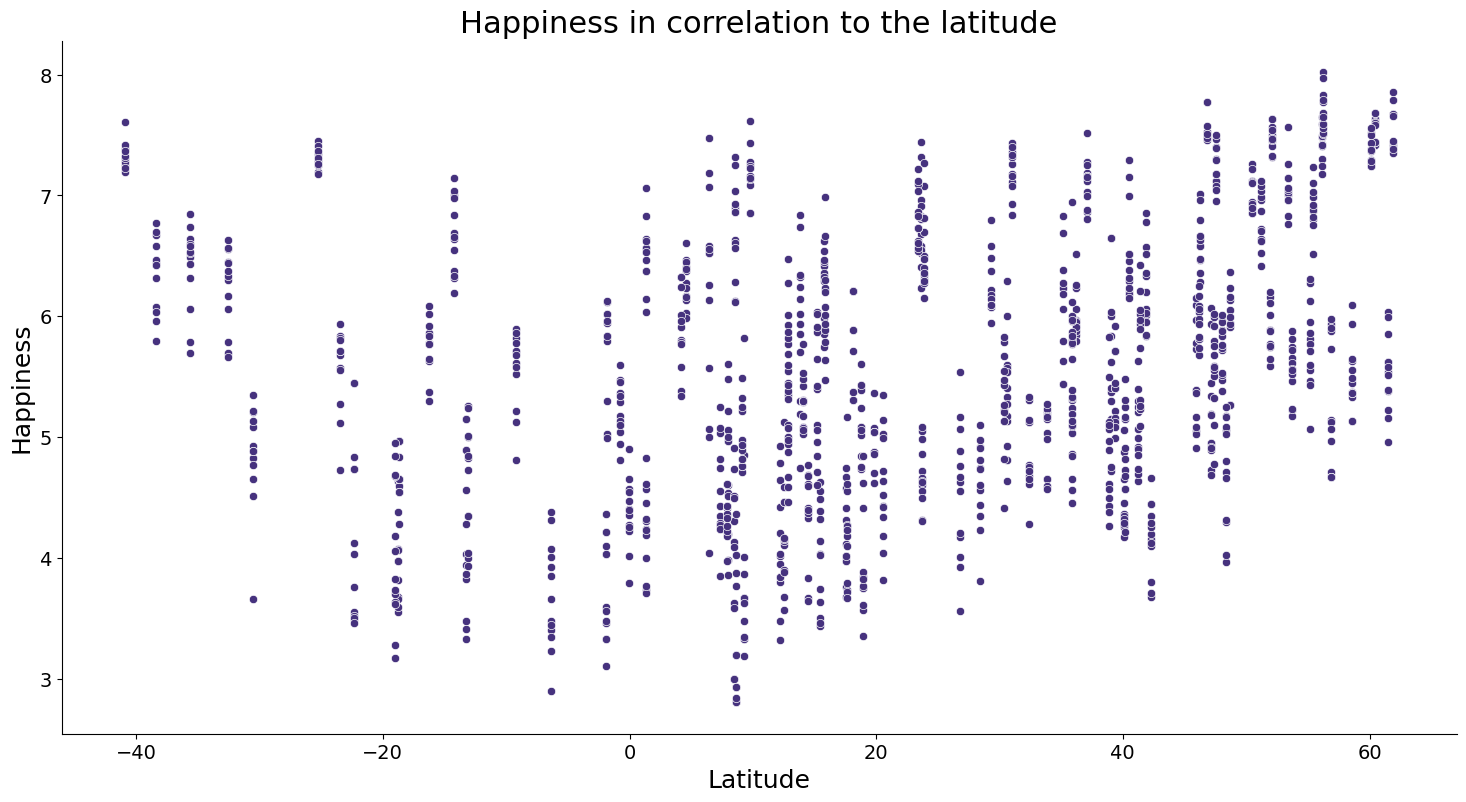

In [36]:
# Latitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_population_combined, x="latitude", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Latitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the latitude')
plt.show()

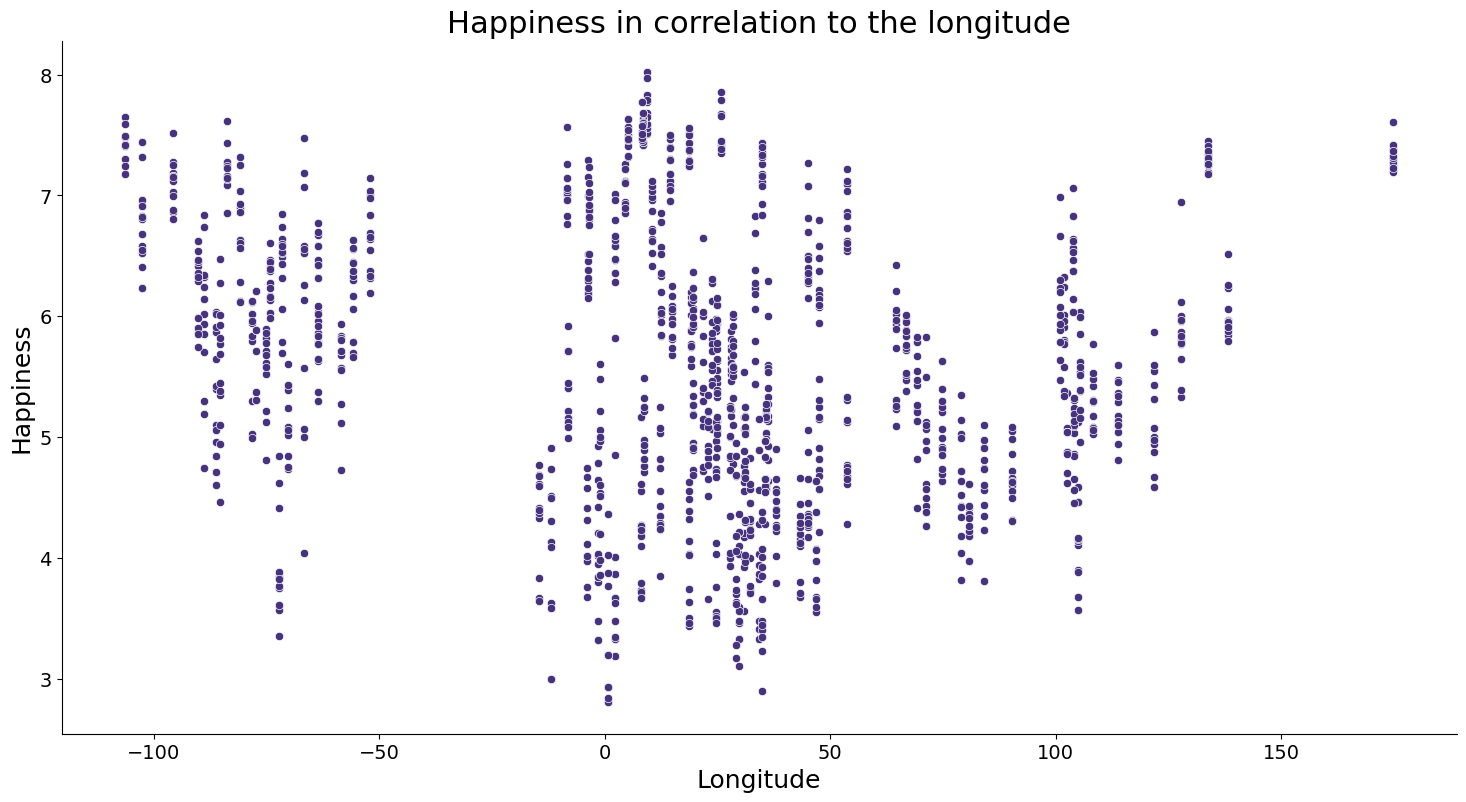

In [37]:
# Longitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_population_combined, x="longitude", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Longitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the longitude')
plt.show()

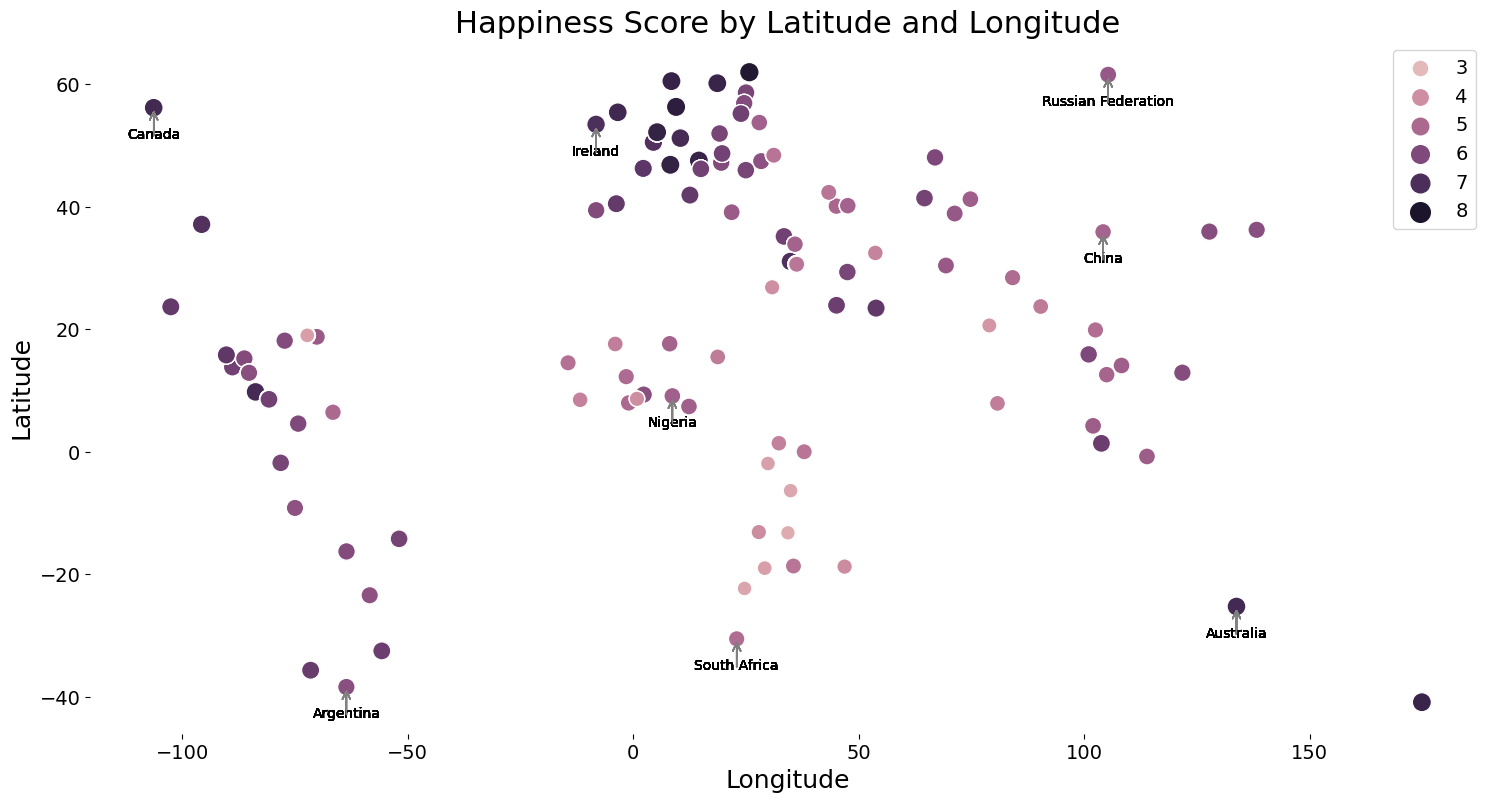

In [75]:
# Set up the cubehelix colormap
cmap = sns.cubehelix_palette(dark=.1, light=.8, as_cmap=True)

# Set up the plot
fig, ax = plt.subplots(figsize=(18, 9))

# Create a scatter plot with longitude, latitude, and happiness score
plot = sns.scatterplot(data=df_population_combined, 
                       x="longitude", 
                       y="latitude", 
                       hue="happiness_score", 
                       palette=cmap,
                       size="happiness_score", 
                       sizes=(100, 200),
                       ax=ax)

# Adjust the formatting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc = 'upper right')

# Annotate specific countries 
countries_to_label = ['Canada', 'Russian Federation', 'Australia', 'South Africa', 'Argentina', 'China', 'Nigeria', 'Ireland']
sample_countries = df_population_combined[df_population_combined['country'].isin(countries_to_label)]
for idx, row in sample_countries.iterrows():
    # Adjust these offsets for better positioning
    x_offset = 0  # offset for longitude
    y_offset = -5  # offset for latitude
    
    ax.text(row['longitude'] + x_offset, row['latitude'] + y_offset, row['country'], 
            fontsize=10, ha='center')
    
    # Arrow from text to point
    ax.annotate("", xy=(row['longitude'], row['latitude']), 
                xytext=(row['longitude'] + x_offset, row['latitude'] + y_offset),
                arrowprops=dict(arrowstyle="->", lw=1, color='gray'))

plt.title('Happiness Score by Latitude and Longitude')
plt.show()


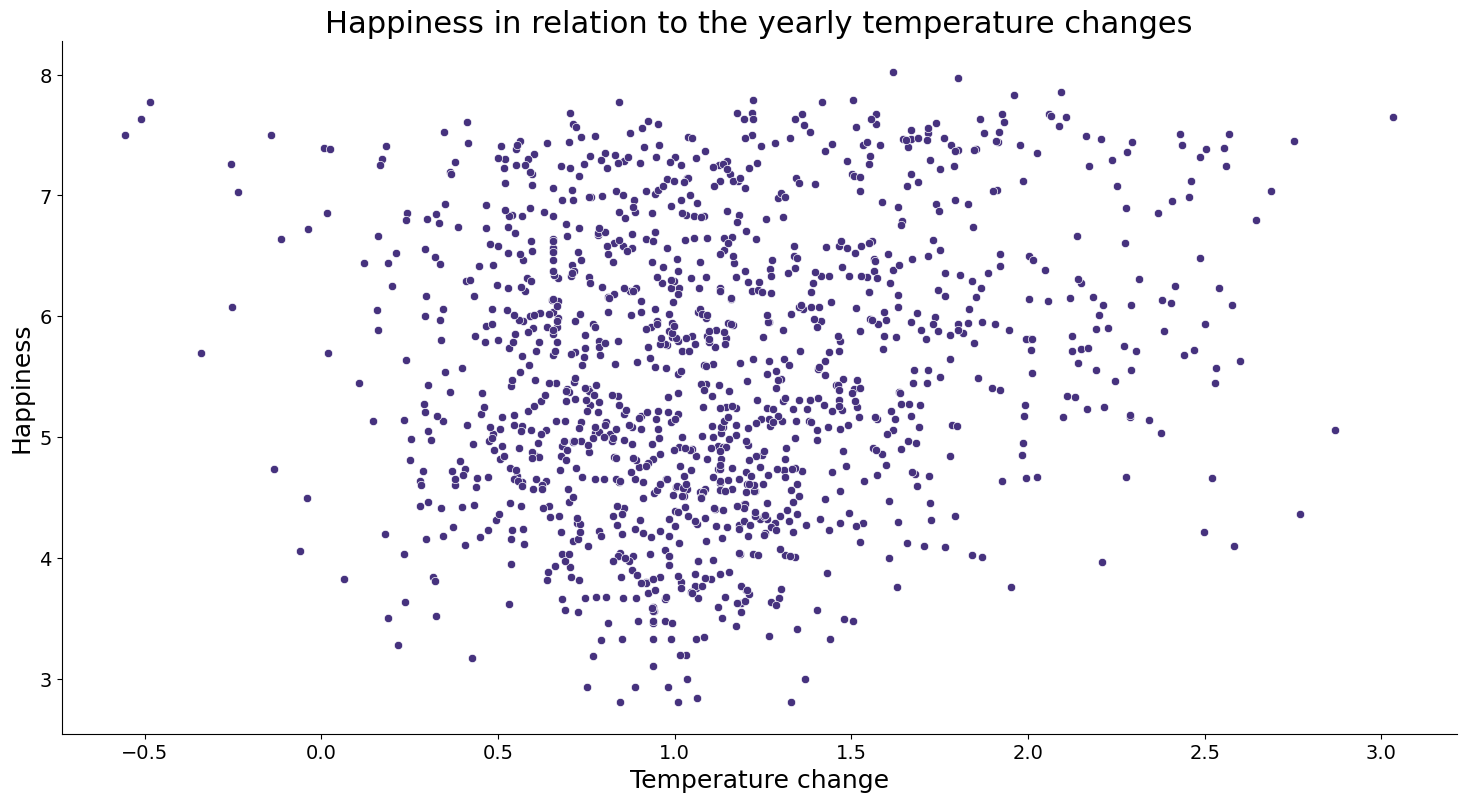

In [39]:
# Temperature developement
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_environment_combined, x="temperature_change", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Temperature change')
plt.ylabel('Happiness')

plt.title('Happiness in relation to the yearly temperature changes')
plt.show()

### Corruption

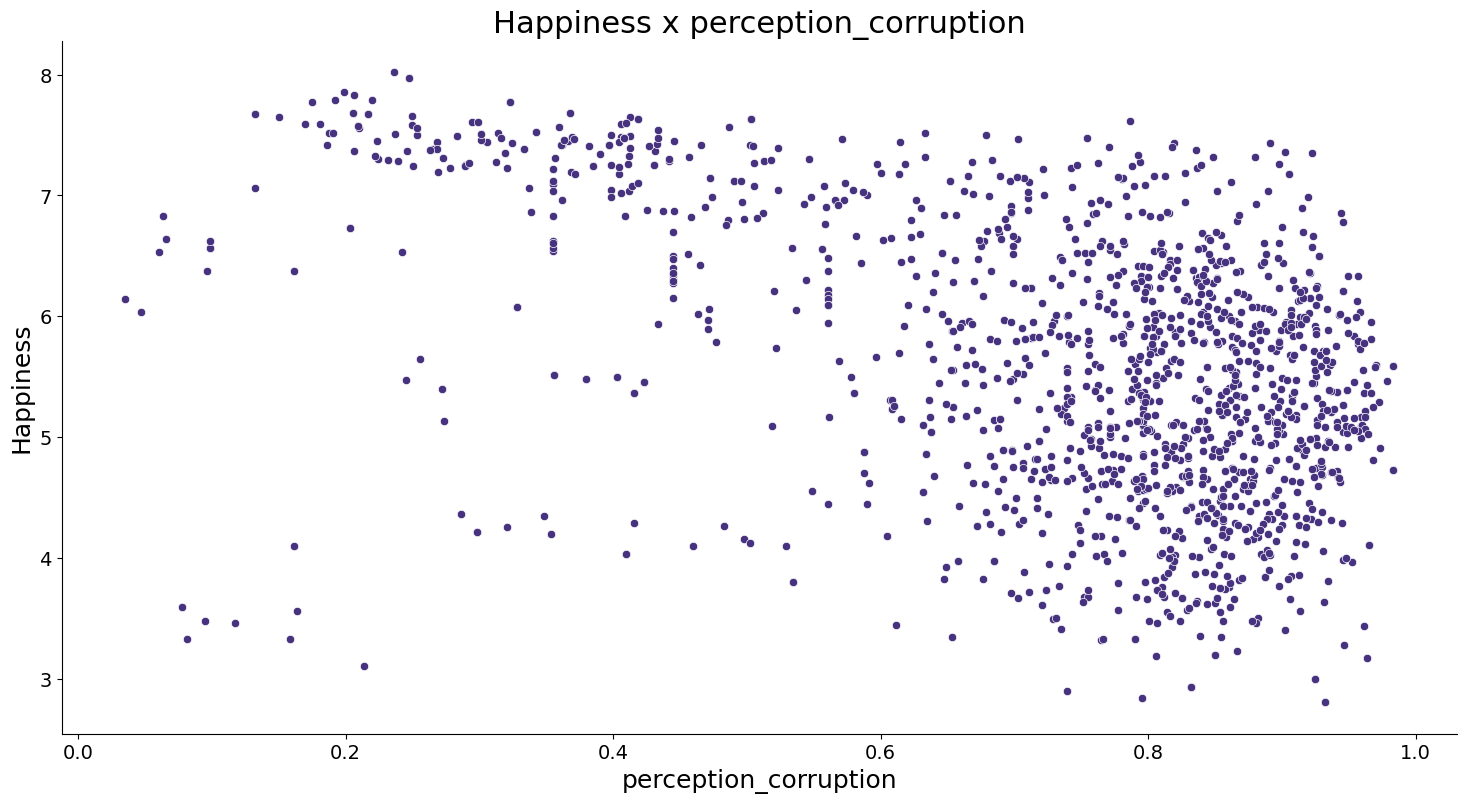

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_happiness, x="perception_corruption", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('perception_corruption')
plt.ylabel('Happiness')

plt.title('Happiness x perception_corruption')
plt.show()

### Government confidence

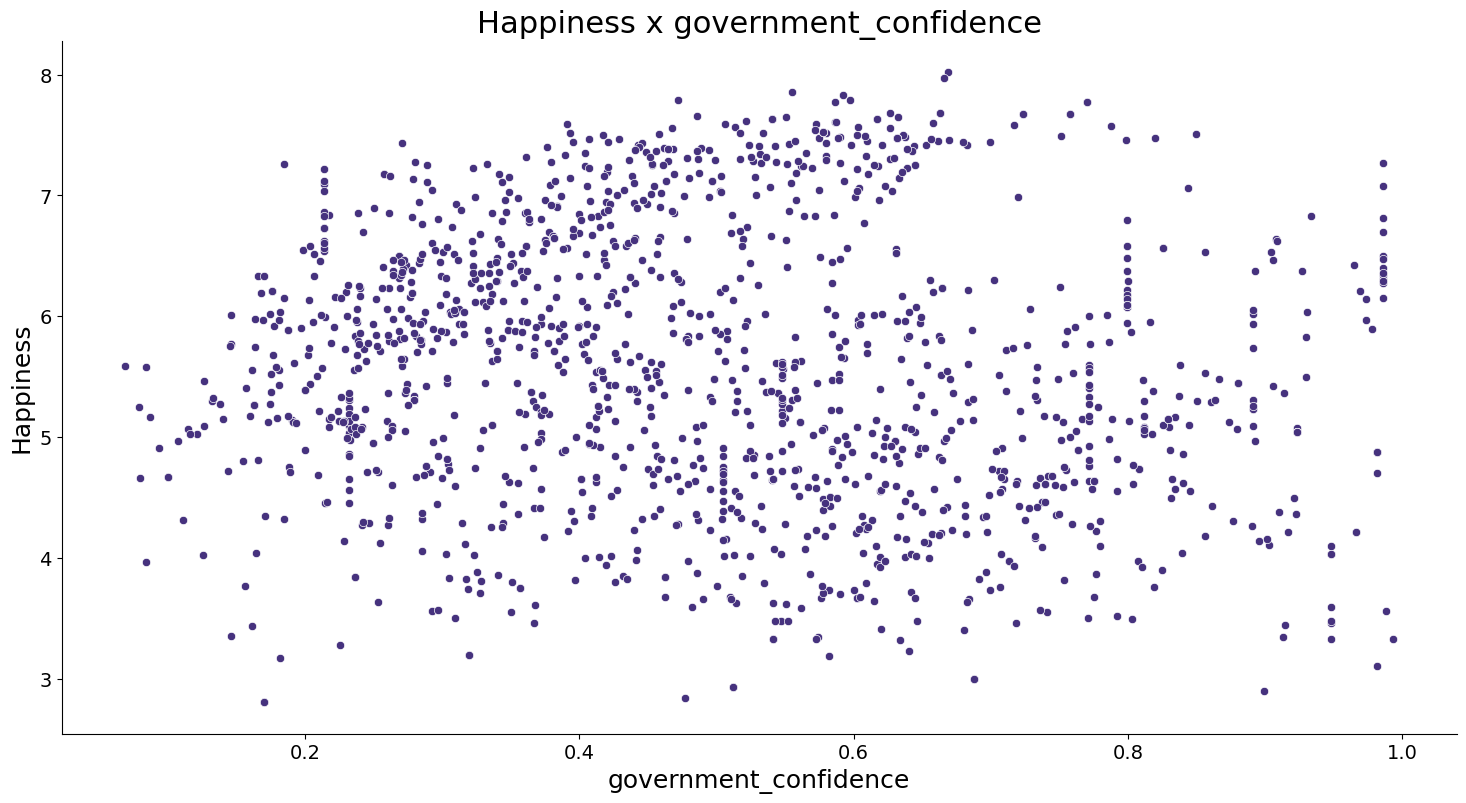

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.scatterplot(data=df_happiness, x="government_confidence", y="happiness_score")

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('government_confidence')
plt.ylabel('Happiness')

plt.title('Happiness x government_confidence')
plt.show()

## aggregate by gdp per capita

In [42]:
# Calculate quantiles
quantiles = all_dataframes_combined['GDP_per_person'].quantile([0.33, 0.66])

# Create labels
labels = ['low', 'medium', 'high']

# Cut gdp into bins and label
all_dataframes_combined['gdp_categorical'] = pd.cut(all_dataframes_combined['GDP_per_person'], 
                                                   bins=[0, quantiles[0.33], quantiles[0.66], max(all_dataframes_combined['gdp'])],
                                                   labels=labels)


### happiness score over time

TODO: spike von low gdp angucken

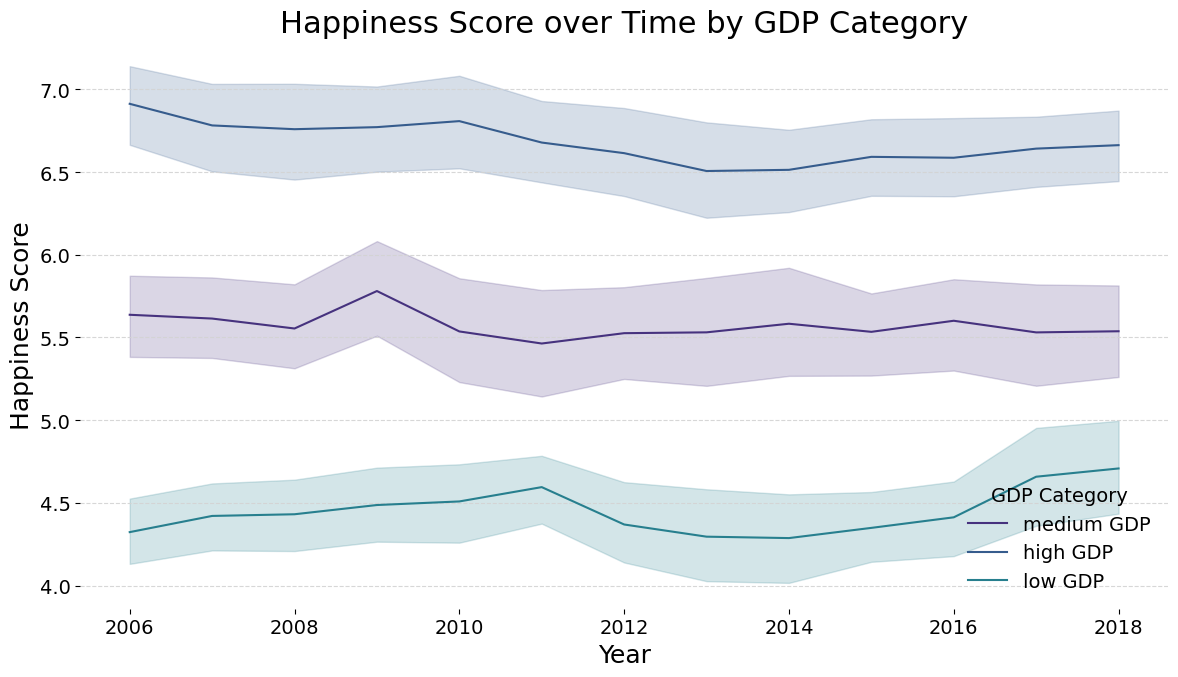

In [61]:
categories = all_dataframes_combined['gdp_categorical'].unique()
num_categories = len(categories)
fig, ax = plt.subplots(figsize=(12, 7))

max_happiness_score = all_dataframes_combined['happiness_score'].max()

# Plot the data for each category
for category in categories:
    df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
    df_filtered = df_filtered.dropna()
    sns.lineplot(data=df_filtered, x='year', y='happiness_score', ax=ax, label=f"{category} GDP")

# Adjusting y-label to a more descriptive name
ax.set_ylabel('Happiness Score')
ax.set_xlabel('Year')
ax.set_title('Happiness Score over Time by GDP Category')

# Adding light gray horizontal gridlines for orientation
ax.yaxis.grid(True, linestyle='--', which='major', color='lightgrey', alpha=.9)

# Removing the box (spines) around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adjusting legend style to be clearer and simpler
ax.legend(title='GDP Category', frameon=False)

plt.tight_layout()
plt.show()


### plot happiness x predictors (GDP categories)

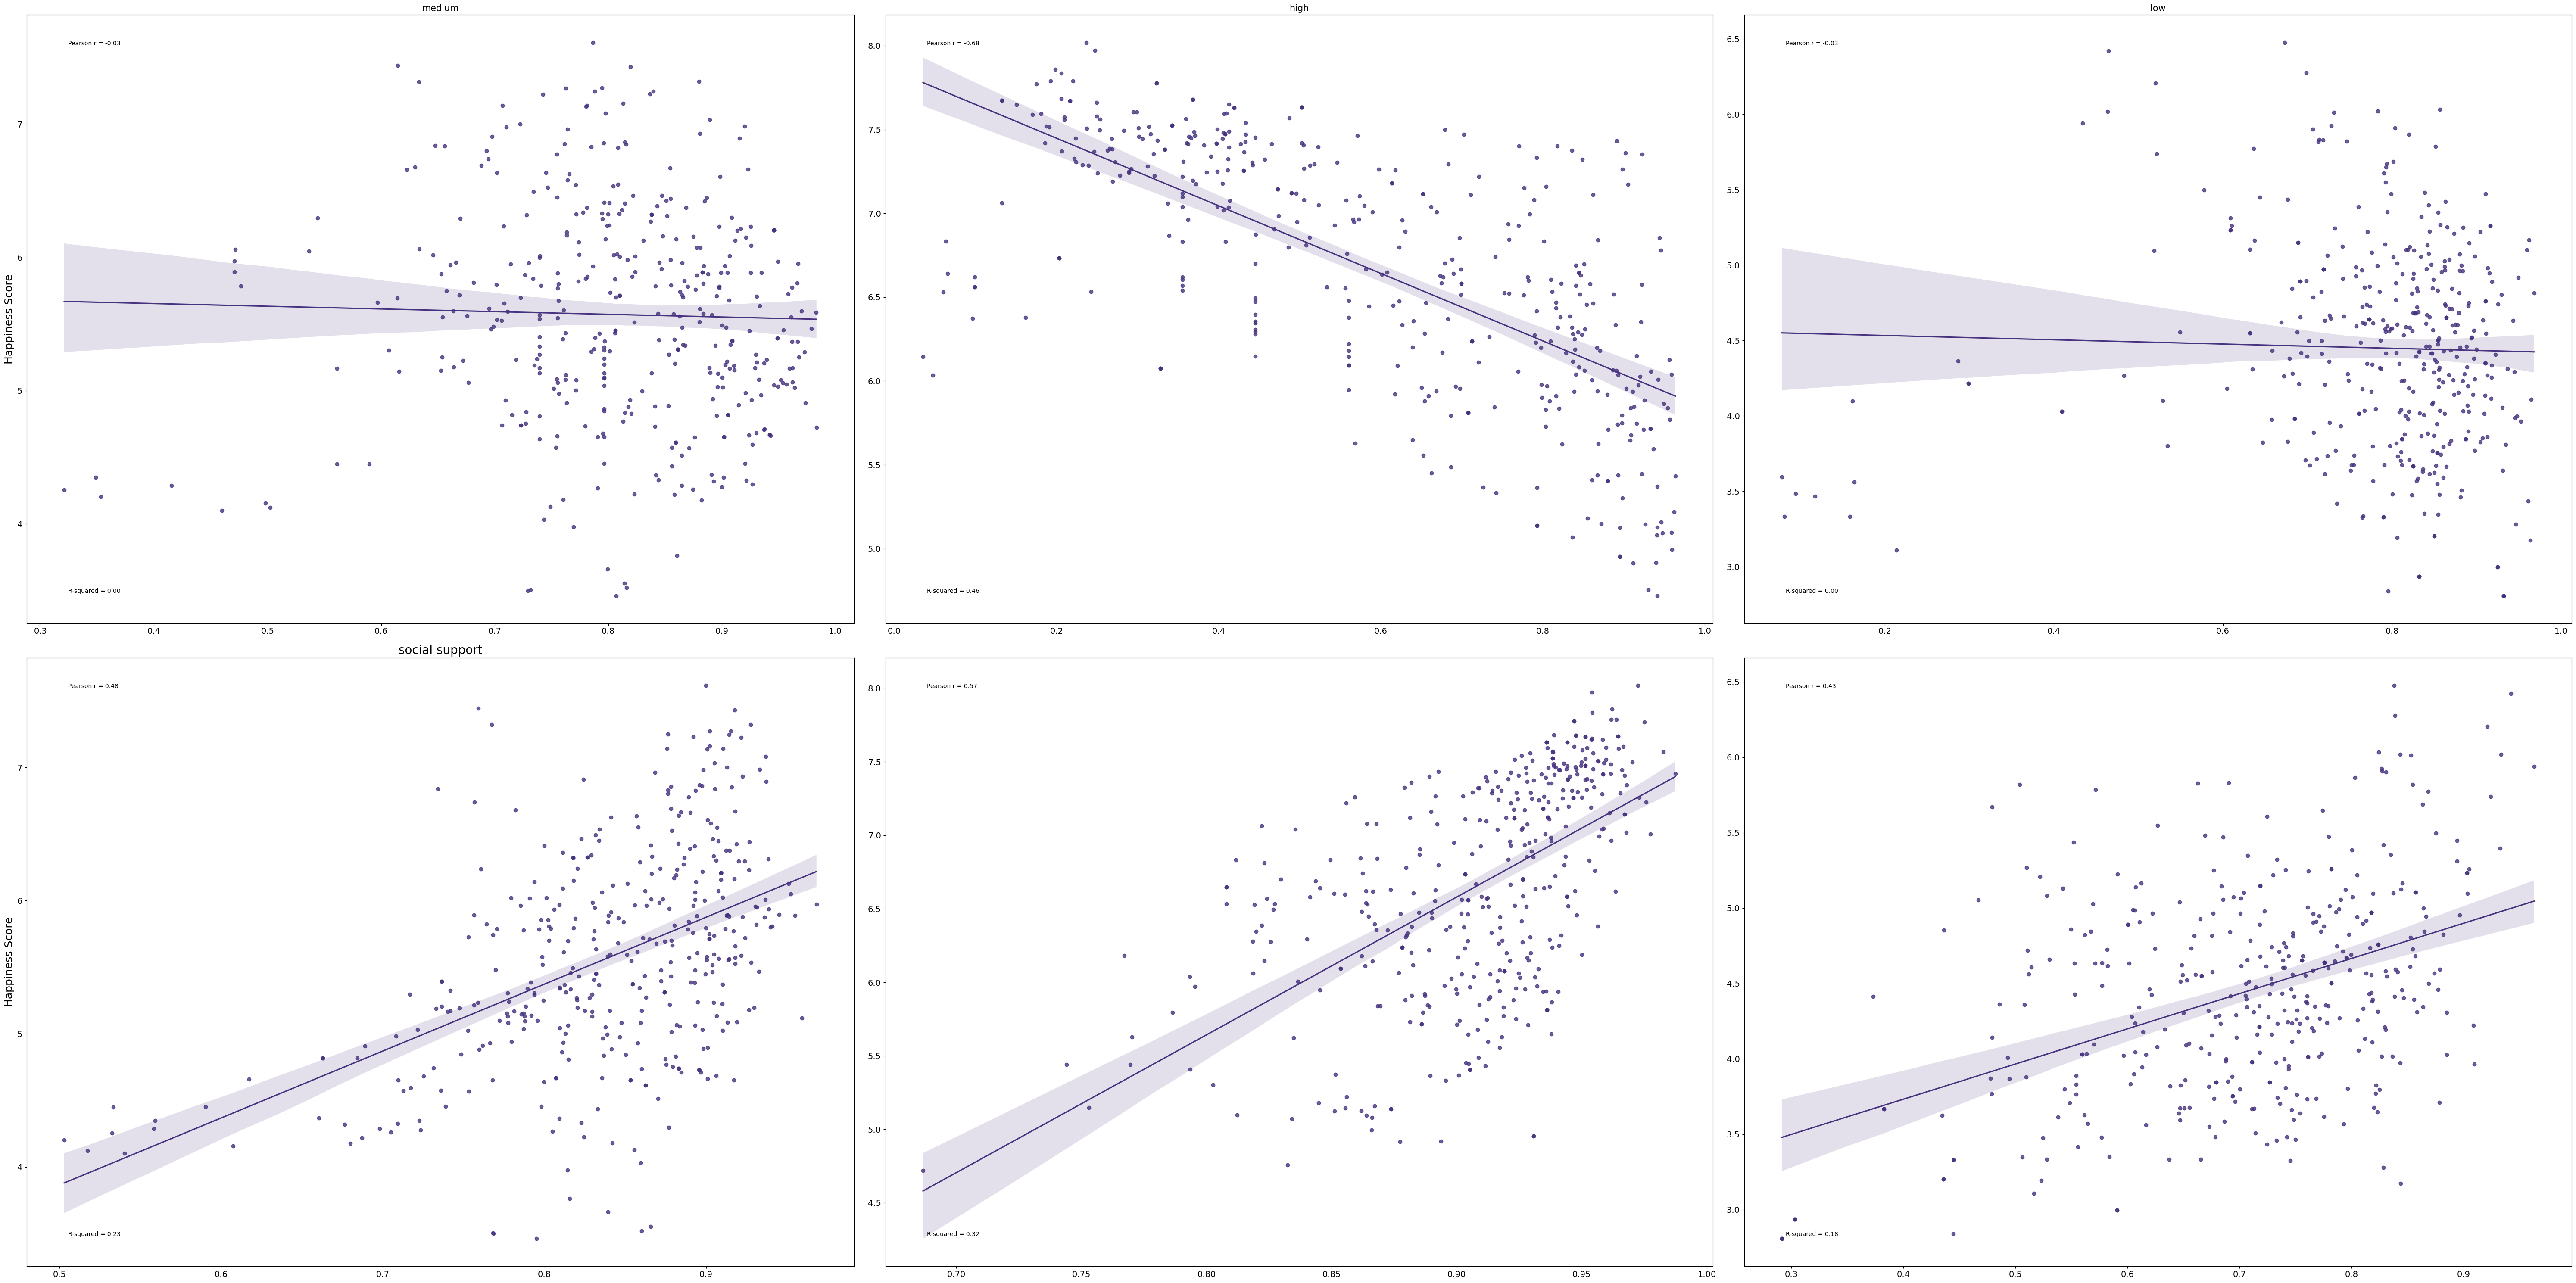

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

predictor_list = [
         'perception_corruption', 'social_support' ]

predictor_names = [ 
       'perception corruption', 'social support' ]

category_list = all_dataframes_combined.gdp_categorical.unique()

num_rows = len(predictor_list)
num_cols = len(category_list)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 30))

for i, predictor in enumerate(predictor_list):
    for j, category in enumerate(category_list):
        df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
        df_filtered = df_filtered.dropna()

        regr = LinearRegression()
        regr.fit(df_filtered[[predictor]], df_filtered['happiness_score'])

        r_squared = regr.score(df_filtered[[predictor]], df_filtered['happiness_score'])

        corr = np.corrcoef(df_filtered[predictor], df_filtered['happiness_score'])[0, 1]

        ax = axes[i, j]
        sns.regplot(data=df_filtered, x=predictor, y="happiness_score", ax=ax)

        ax.text(0.05, 0.95, f'Pearson r = {corr:.2f}', transform=ax.transAxes, fontsize=10)
        ax.text(0.05, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=10)

        if j == 0:
            ax.set_ylabel("Happiness Score")
            ax.set_title(predictor_names[i], fontsize=20)
        else:
            ax.set_ylabel('')
            ax.set_title('', fontsize=12)
        
        ax.set_xlabel('')
        
        # Set category name as title for top row of plots
        if i == 0:
            ax.set_title(category, fontsize=15)

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.8)
plt.tight_layout()
plt.show()


**für perception_corruptuion und gini schein aggregieren nach gdp tatsächlcih einen unterschied zu machen**

## Aggregate all datasets and determine main influence with ML

In [45]:
numerical_df = all_dataframes_combined.select_dtypes(include=[np.number])
numerical_df.dropna(inplace=True)
numerical_df

year  \
0     2006   
1     2007   
2     2008   
3     2009   
4     2010   
...    ...   
1191  2014   
1192  2015   
1193  2016   
1194  2017   
1195  2018   

      Probability (%) of dying between age 30 and exact age 70 from illness (all)  \
0                                                 18.30                             
1                                                 18.80                             
2                                                 18.00                             
3                                                 17.80                             
4                                                 17.80                             
...                                                 ...                             
1191                                              31.20                             
1192                                              31.10                             
1193                                              30.40                             
1194                                              29.30                             
1195                                              28.50                             

      Suicides per 100000 (all)  happiness_score  social_support  \
0                          8.60             6.31            0.94   
1                          8.30             6.07            0.86   
2                          8.70             5.96            0.89   
3                          8.40             6.42            0.92   
4                          8.60             6.44            0.93   
...                         ...              ...             ...   
1191                      18.20             4.18            0.77   
1192                      18.00             3.70            0.74   
1193                      16.80             3.74            0.77   
1194                      15.00             3.64            0.75   
1195                      14.00             3.62            0.78   

      birth_health  freedom  generosity  perception_corruption  \
0            65.82     0.73       -0.16                   0.85   
1            65.94     0.65       -0.14                   0.88   
2            66.06     0.68       -0.13                   0.86   
3            66.18     0.64       -0.13                   0.88   
4            66.30     0.73       -0.13                   0.85   
...            ...      ...         ...                    ...   
1191         50.00     0.64       -0.06                   0.82   
1192         51.20     0.67       -0.11                   0.81   
1193         51.67     0.73       -0.08                   0.72   
1194         52.15     0.75       -0.08                   0.75   
1195         52.62     0.76       -0.05                   0.84   

      government_confidence  percent_internet_users  Area (km²)  population  \
0                      0.52                   20.93  2780400.00 37070774.00   
1                      0.41                   25.95  2780400.00 37070774.00   
2                      0.29                   28.11  2780400.00 37070774.00   
3                      0.27                   34.00  2780400.00 37070774.00   
4                      0.35                   45.00  2780400.00 41100123.00   
...                     ...                     ...         ...         ...   
1191                   0.57                   16.36   390757.00 12839771.00   
1192                   0.59                   22.74   390757.00 14154937.00   
1193                   0.70                   23.12   390757.00 14154937.00   
1194                   0.68                   24.40   390757.00 14154937.00   
1195                   0.55                   25.00   390757.00 14154937.00   

      population density  latitude  longitude             gdp  GDP_per_person  \
0                  13.33    -38.42     -63.62 232557260817.00         6273.00   
1                  13.33    -38.42     -63.62 287530508431.00         7756.00   
2             

Mean happiness: 5.57
MSE: 0.11
RMSE: 0.33
Relative RMSE: 5.89 %
R²-Score 0.906


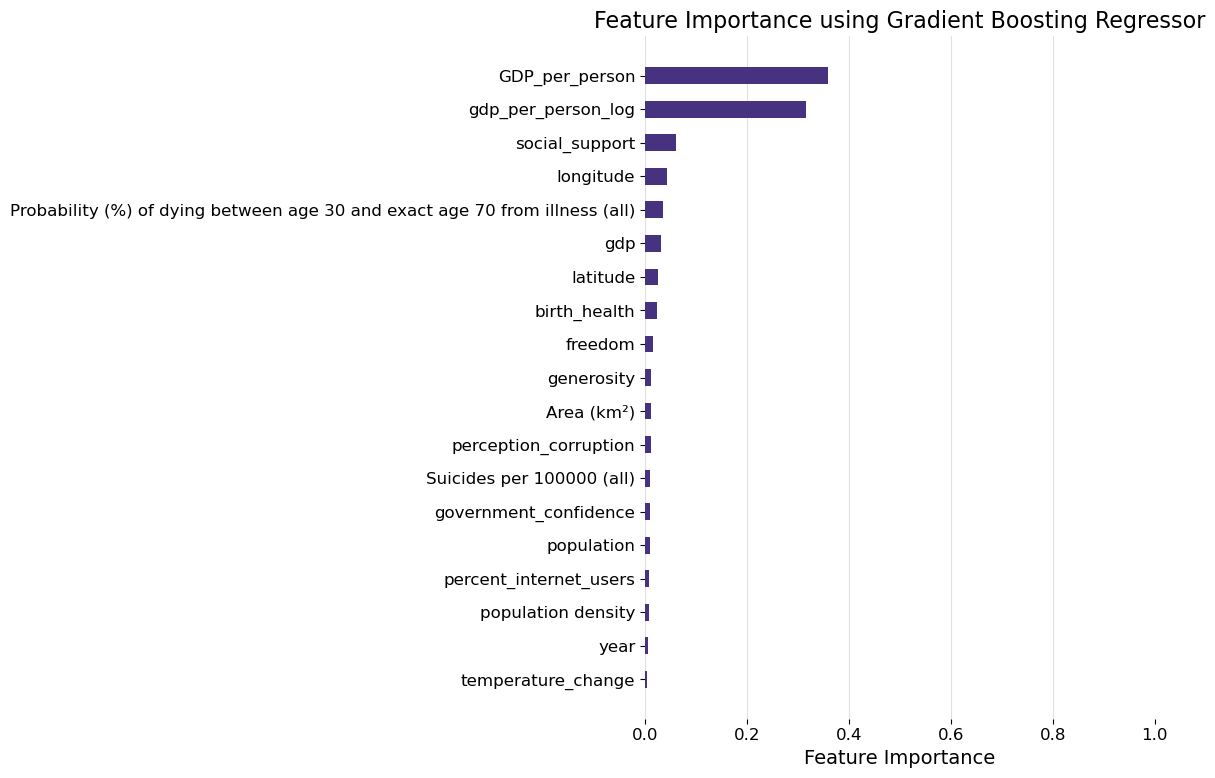

In [73]:
# ML
x = numerical_df.drop('happiness_score', axis=1)
y = numerical_df[['happiness_score']]
y = np.ravel(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

ML_GradientBoostingRegressor = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
ML_GradientBoostingRegressor.fit(x_train, y_train)

y_pred=ML_GradientBoostingRegressor.predict(x_test)

print("Mean happiness:", round(numerical_df['happiness_score'].mean(), 2))
print("MSE:",round(mean_squared_error(y_test, y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("Relative RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(numerical_df['happiness_score']) * 100, 2), "%")
print("R²-Score",round(ML_GradientBoostingRegressor.score(x_test,y_test),3))

feature_importances = ML_GradientBoostingRegressor.feature_importances_
feature_names = x.columns.tolist()

# Sort the features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Adjusted the figure height from 12 to 8 for a less tall plot
plt.figure(figsize=(12, 8))  
plt.barh(range(len(sorted_importances)), sorted_importances, align='center', height=0.5)
plt.yticks(range(len(sorted_importances)), sorted_feature_names, fontsize=12) 
plt.xticks(fontsize=12)
plt.xlim(0,1)
plt.xlabel("Feature Importance", fontsize=14)

# Adding vertical light gray gridlines for orientation
plt.gca().xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=.7)
plt.gca().set_axisbelow(True)

# Keeping only the left and bottom spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.title('Feature Importance using Gradient Boosting Regressor', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis to show the feature with the highest importance at the top

plt.tight_layout()
plt.show()

## happiest vs least happiest countries over years

In [47]:

predictors = ['happiness_score','Probability (%) of dying between age 30 and exact age 70 from illness (all)',
              'Suicides per 100000 (all)',
              'percent_internet_users',
              'population density',
              'GDP_per_person',
              
              'temperature_change']


In [82]:
def plot_interactive(number_countries_to_average):
    country_happiness = all_dataframes_combined.groupby('country')['happiness_score'].mean()
    sorted_countries = country_happiness.sort_values()
    least_happy_countries = sorted_countries.head(number_countries_to_average).index
    happy_countries = sorted_countries.tail(number_countries_to_average).index

    n = len(predictors)
    ncols = 2
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=predictors, row_heights=[0.5] * nrows)

    plotted_predictors = set()
    min_xlim = float('inf')
    max_xlim = float('-inf')

    for df in new_dataframes:
        for idx, predictor in enumerate(predictors):
            if predictor in df.columns and predictor not in plotted_predictors:
                years = list(range(int(df.year.min()), int(df.year.max()) + 1))
                happy_means = []
                least_happy_means = []

                for year in years:
                    year_df = df[df['year'] == year]
                    happy_mean = year_df[year_df['country'].isin(happy_countries)][predictor].mean()
                    least_happy_mean = year_df[year_df['country'].isin(least_happy_countries)][predictor].mean()

                    if not pd.isnull(happy_mean):
                        happy_means.append(happy_mean)
                    if not pd.isnull(least_happy_mean):
                        least_happy_means.append(least_happy_mean)

                if len(happy_means) > 0 and len(least_happy_means) > 0:
                    min_len = min(len(happy_means), len(least_happy_means))
                    happy_means = happy_means[:min_len]
                    least_happy_means = least_happy_means[:min_len]

                    row = idx // ncols + 1
                    col = idx % ncols + 1

                    fig.add_trace(go.Scatter(x=years[:len(happy_means)], y=happy_means, 
                         mode='lines', name='Happiest Countries',
                         line=dict(color="red")), row=row, col=col)

                    fig.add_trace(go.Scatter(x=years[:len(least_happy_means)], y=least_happy_means,
                         mode='lines', name='Least Happiest Countries',
                         line=dict(color="blue")), row=row, col=col)

                    plotted_predictors.add(predictor)

                    min_xlim = min(min_xlim, min(years[:len(happy_means)]))
                    max_xlim = max(max_xlim, max(years[:len(happy_means)]))

    for row in range(1, nrows + 1):
        for col in range(1, ncols + 1):
            fig.update_xaxes(range=[min_xlim, max_xlim], row=row, col=col)
            fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', row=row, col=col)  # This line adds the horizontal gridlines
    for trace_idx, trace in enumerate(fig.data):
        if trace_idx >= 2:  # Skip the first two traces
            trace.showlegend = False

    fig.update_layout(
      height=600, 
      width=1000,
      title_text=f'Top {number_countries_to_average} Happiest Countries vs Bottom {number_countries_to_average} Least Happy Countries',
      showlegend=True,
      plot_bgcolor='rgba(0,0,0,0)',
      xaxis=dict(showgrid=False, zeroline=False),
      yaxis=dict(showgrid=True, gridcolor='lightgrey', zeroline=False)    
    )

    fig.show()

interact(plot_interactive, number_countries_to_average=widgets.IntSlider(min=1, max=all_dataframes_combined.country.nunique()//2, step=1, value=3))

interactive(children=(IntSlider(value=3, description='number_countries_to_average', max=46, min=1), Output()),…

<function __main__.plot_interactive(number_countries_to_average)>

# Visualisierungen

## 3D plot with happiness_score as color

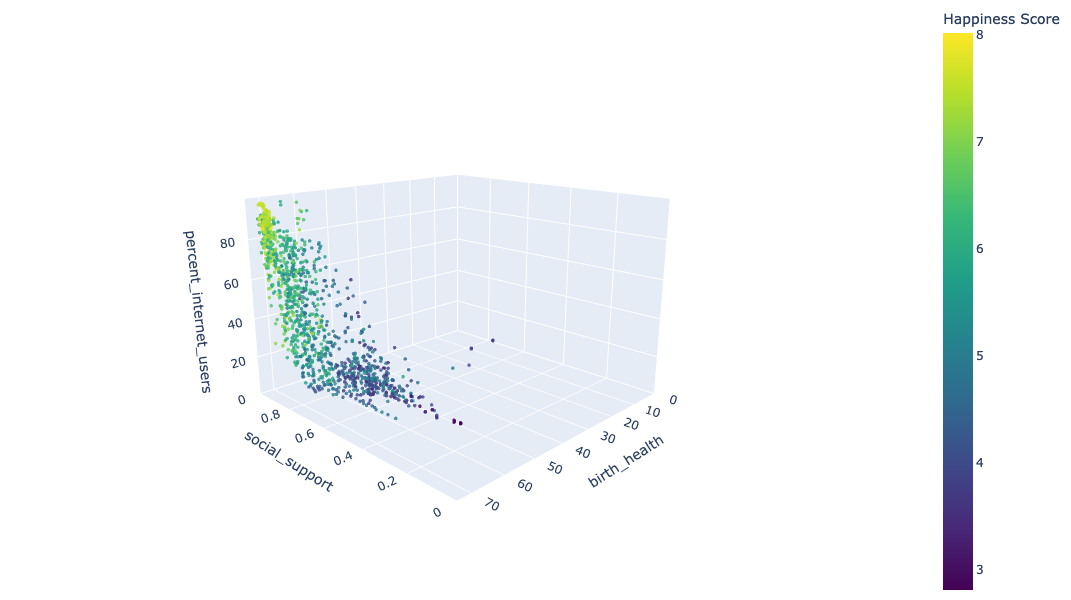

In [49]:


def plot3D(x_data, y_data, z_data, color_data=all_dataframes_combined['happiness_score']):
    fig = go.Figure(data=go.Scatter3d(
        x=all_dataframes_combined[x_data],
        y=all_dataframes_combined[y_data],
        z=all_dataframes_combined[z_data],
        mode='markers',
        marker=dict(
            size=2,
            color=color_data,
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(title='Happiness Score') 
        )
    ))

    fig.update_layout(scene=dict(
        xaxis_title=x_data,
        yaxis_title=y_data,
        zaxis_title=z_data,
        xaxis_range=[0, all_dataframes_combined[x_data].max()],  #
        yaxis_range=[0, all_dataframes_combined[y_data].max()],  
        zaxis_range=[0, all_dataframes_combined[z_data].max()]  
    ))
    fig.update_layout(
        width=800,  
        height=600,  
        margin=dict(l=0, r=0, b=0, t=0),  
        scene=dict(
            aspectratio=dict(x=1, y=1, z=0.7),  
            camera=dict(
                eye=dict(x=-1.7, y=1.7, z=.7)  
            )
        )
    )

    fig.show()

plot3D("social_support", "birth_health", "percent_internet_users")

In [50]:
# Erstellen Sie eine eigenständige Kopie von df_most_important_factors
df_most_important_factors = all_dataframes_combined[['country', 'year', 'happiness_score','GDP_per_person','social_support','percent_internet_users','birth_health','Probability (%) of dying between age 30 and exact age 70 from illness (all)']].copy()
#df_most_important_factors = df_most_important_factors[df_most_important_factors['year'] == 2018]
df_most_important_factors = df_most_important_factors.reset_index(drop=True)
df_most_important_factors.head()

country  year  happiness_score  GDP_per_person  social_support  \
0  Argentina  2006             6.31         6273.00            0.94   
1  Argentina  2007             6.07         7756.00            0.86   
2  Argentina  2008             5.96         9753.00            0.89   
3  Argentina  2009             6.42         8982.00            0.92   
4  Argentina  2010             6.44        10307.00            0.93   

   percent_internet_users  birth_health  \
0                   20.93         65.82   
1                   25.95         65.94   
2                   28.11         66.06   
3                   34.00         66.18   
4                   45.00         66.30   

   Probability (%) of dying between age 30 and exact age 70 from illness (all)  
0                                              18.30                            
1                                              18.80                            
2                                              18.00                            
3                                              17.80                            
4                                              17.80

## Cluster analysis

/Users/fynn/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



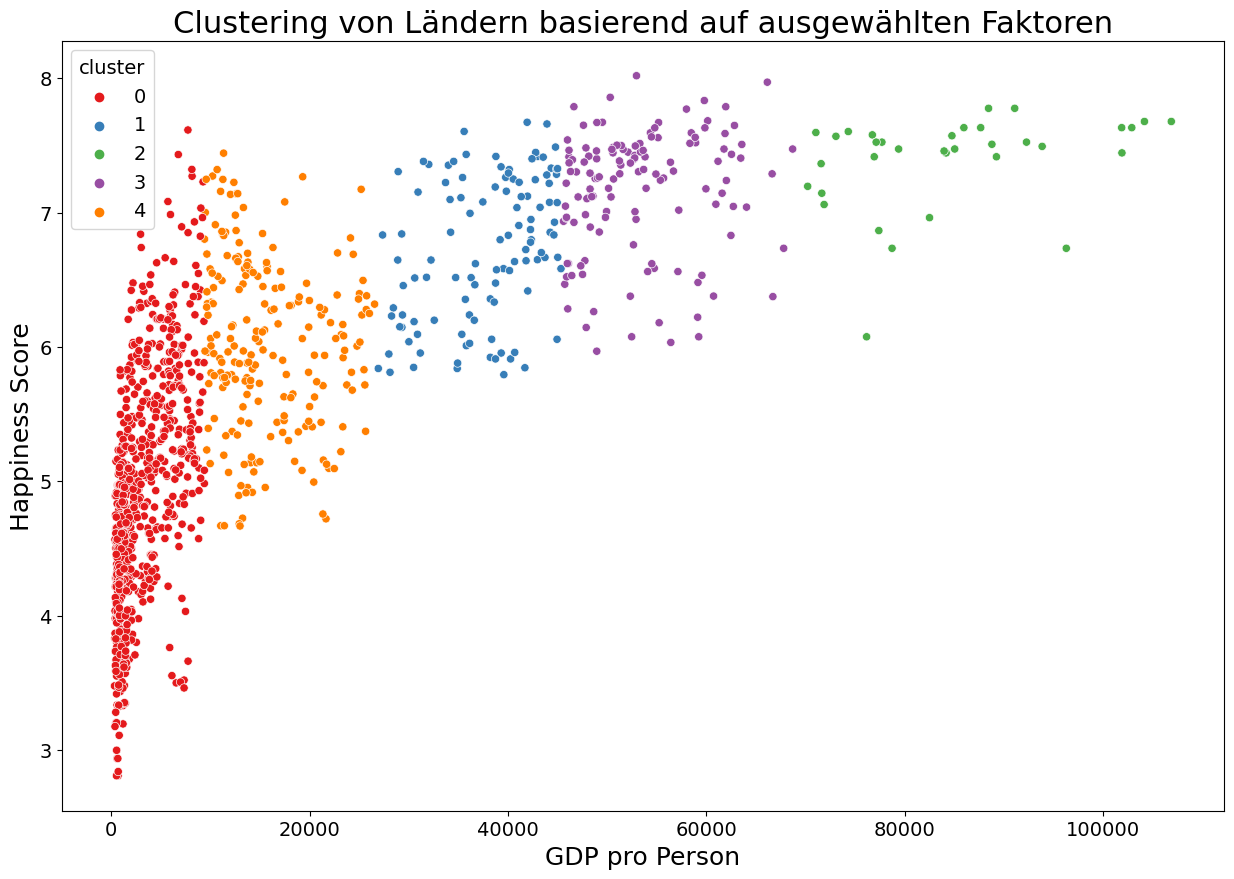

interactive(children=(IntSlider(value=0, description='Cluster:', max=4), Output()), _dom_classes=('widget-inte…

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from ipywidgets import interact, widgets

# Durchführung der K-Means-Clusteranalyse
num_clusters = 5  # Anzahl der gewünschten Cluster
features = ['GDP_per_person', 'social_support', 'percent_internet_users', 'birth_health', 'Probability (%) of dying between age 30 and exact age 70 from illness (all)']

# Feature-Matrix für die Clusteranalyse erstellen
X = df_most_important_factors[features]

# K-Means-Modell erstellen und anpassen
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_most_important_factors['cluster'] = kmeans.fit_predict(X)

# Scatter-Plot erstellen und die Cluster mit verschiedenen Farben darstellen
plt.figure(figsize=(15, 10))
sns.scatterplot(x='GDP_per_person', y='happiness_score', hue='cluster', data=df_most_important_factors, palette='Set1')
plt.title("Clustering von Ländern basierend auf ausgewählten Faktoren")
plt.xlabel("GDP pro Person")
plt.ylabel("Happiness Score")

# Interaktive Funktion zur Anzeige von Details für ausgewählten Cluster
def display_cluster_details(cluster):
    plt.figure(figsize=(15, 5))
    cluster_data = df_most_important_factors[df_most_important_factors['cluster'] == cluster]
    cluster_stats = cluster_data[features].mean()
    
    # Balkendiagramm erstellen, um durchschnittliche Faktoren im Cluster zu zeigen
    sns.barplot(x=cluster_stats.index, y=cluster_stats.values)
    plt.title(f"Durchschnittliche Faktoren im Cluster {cluster}")
    plt.xticks(rotation=45)
    plt.xlabel("Faktoren")
    plt.ylabel("Durchschnittlicher Wert")
    
    plt.show()

# Interaktives Widget zur Auswahl des Clusters
cluster_slider = widgets.IntSlider(value=0, min=0, max=num_clusters - 1, description='Cluster:')
interact(display_cluster_details, cluster=cluster_slider)

plt.show()

## Are there any outliers in the relationship between GDP and happiness?

In [53]:
df_most_important_factors['outlier_check'] = df_most_important_factors['happiness_score'] / np.log(df_most_important_factors['GDP_per_person'])

In [54]:
from scipy import stats

unique_years = df_most_important_factors['year'].unique()

def plot_relationship(year_index):
    year = unique_years[year_index]
    plt.figure(figsize=(20, 12))  # Diagrammgröße anpassen
    
    # Daten für das ausgewählte Jahr abrufen
    data_year = df_most_important_factors[df_most_important_factors['year'] == year]

    # Achsenlimits festlegen
    x_min = df_most_important_factors['GDP_per_person'].min()
    x_max = df_most_important_factors['GDP_per_person'].max()
    plt.xlim(x_min, x_max)
    plt.ylim(0, 10)

    # log x-Achse
    plt.xscale('log')

    # Streudiagramm erstellen
    scatter = sns.scatterplot(x="GDP_per_person", y="happiness_score", data=data_year,
                              s=50, color='blue')
    
    # Diagramm beschriften
    plt.title(f"Beziehung zwischen GDP pro Person und Happiness Score ({year})")
    plt.xlabel("GDP pro Person")
    plt.ylabel("Happiness Score")

    # Identifiziere Ausreißer basierend auf dem Zusammenhang zwischen GDP_per_person und happiness_score
    z_scores = stats.zscore(data_year[['outlier_check']])
    outliers = data_year[(z_scores > 2).any(axis=1) | (z_scores < -2).any(axis=1)]

    # Längere Pfeile für Ausreißer im Diagramm
    arrow_length = 40  # Hier können Sie die Länge der Pfeile anpassen

    for i, row in outliers.iterrows():
        x = row["GDP_per_person"]
        y = row["happiness_score"]
        country = row["country"]

        # Zwei verschiedene Richtungen für Pfeile erstellen
        if i % 2 == 0:
            arrow_direction = (1, 1)
        else:
            arrow_direction = (-1, -1)

        plt.annotate(country, (x, y),
                     xytext=(arrow_length * arrow_direction[0], arrow_length * arrow_direction[1]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", lw=1.5, color='red'))
        plt.scatter(x, y, s=100, color='red')

    plt.show()

# Erstelle ein Dropdown-Menü zur Auswahl des Jahres
year_slider = widgets.IntSlider(value=0, min=0, max=len(unique_years) - 1, description='Jahr:')
interact(plot_relationship, year_index=year_slider)

interactive(children=(IntSlider(value=0, description='Jahr:', max=12), Output()), _dom_classes=('widget-intera…

<function __main__.plot_relationship(year_index)>

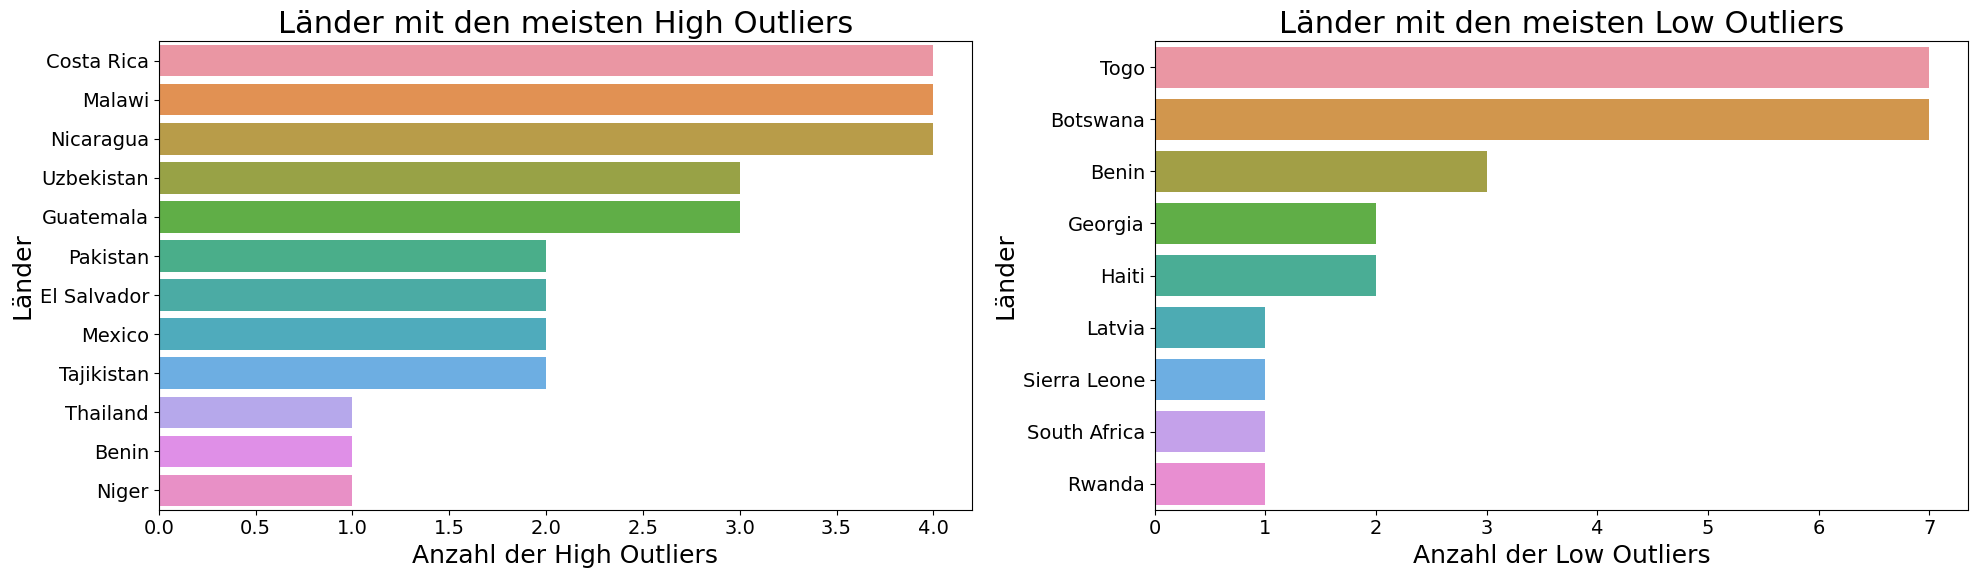

In [55]:
import pandas as pd
import numpy as np
from scipy import stats

# Eine leere Liste erstellen, um die Ausreißer für jedes Jahr zu speichern
outliers_by_year = []

# Eine Schleife durch jedes Jahr in deinem DataFrame durchführen
for year in df_most_important_factors['year'].unique():
    data_year = df_most_important_factors[df_most_important_factors['year'] == year]

    z_scores = stats.zscore(data_year[['outlier_check']])
    
    # Die Zeilen mit positiven Z-Scores sind höher als erwartet
    high_outliers = data_year.loc[(z_scores > 2).any(axis=1), 'country']
    
    # Die Zeilen mit negativen Z-Scores sind niedriger als erwartet
    low_outliers = data_year.loc[(z_scores < -2).any(axis=1), 'country']

    # Die Ausreißer für dieses Jahr zur Liste hinzufügen
    outliers_by_year.append((year, high_outliers.tolist(), low_outliers.tolist()))

# Erstelle ein DataFrame, um die Ausreißer übersichtlicher anzuzeigen
outliers_df = pd.DataFrame(outliers_by_year, columns=['Year', 'High Outliers', 'Low Outliers'])

# Erstelle separate DataFrames für High Outliers und Low Outliers
high_outliers_df = pd.DataFrame({'Country': [country for sublist in outliers_df['High Outliers'] for country in sublist]})
low_outliers_df = pd.DataFrame({'Country': [country for sublist in outliers_df['Low Outliers'] for country in sublist]})

# Zähle die Häufigkeit der Länder in den High Outliers und Low Outliers
high_outliers_counts = high_outliers_df['Country'].value_counts().reset_index()
low_outliers_counts = low_outliers_df['Country'].value_counts().reset_index()

# Benenne die Spalten um
high_outliers_counts.columns = ['Country', 'High Outliers Count']
low_outliers_counts.columns = ['Country', 'Low Outliers Count']

# Sortiere die DataFrames absteigend nach der Anzahl der Ausreißer
high_outliers_counts = high_outliers_counts.sort_values(by='High Outliers Count', ascending=False)
low_outliers_counts = low_outliers_counts.sort_values(by='Low Outliers Count', ascending=False)

# Erstelle Balkendiagramme für High Outliers und Low Outliers
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Balkendiagramm für High Outliers
sns.barplot(x='High Outliers Count', y='Country', data=high_outliers_counts, ax=axs[0])
axs[0].set_title('Länder mit den meisten High Outliers')
axs[0].set_xlabel('Anzahl der High Outliers')
axs[0].set_ylabel('Länder')

# Balkendiagramm für Low Outliers
sns.barplot(x='Low Outliers Count', y='Country', data=low_outliers_counts, ax=axs[1])
axs[1].set_title('Länder mit den meisten Low Outliers')
axs[1].set_xlabel('Anzahl der Low Outliers')
axs[1].set_ylabel('Länder')

# Ausrichtung und Abstand der Diagramme anpassen
plt.tight_layout()

# Diagramm anzeigen
plt.show()

## Outlier detection

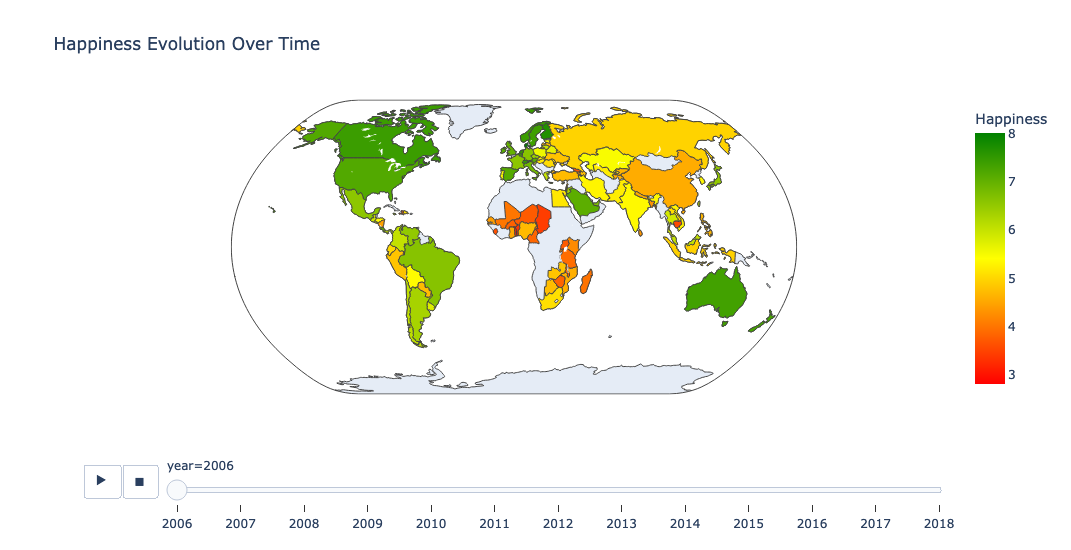

In [56]:
import plotly.express as px
import pandas as pd

# Define a custom color scale
custom_color_scale = [
    [0.0, 'red'],    # Low happiness values will be displayed in red
    [0.5, 'yellow'], # Intermediate values in yellow
    [1.0, 'green']   # High happiness values in green
]

# Create an animated choropleth map with Plotly
fig = px.choropleth(
    df_happiness,
    locations="country",
    locationmode="country names",
    color="happiness_score",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=custom_color_scale,
    projection="natural earth",
    title="Happiness Evolution Over Time",
)

# Customize the color bar and legend range
fig.update_coloraxes(colorbar_title="Happiness", cmin=df_happiness['happiness_score'].min(), cmax=df_happiness['happiness_score'].max())  # Adjust the range as needed

# Adjust the figure size when displaying it
fig.update_layout(width=1100, height=550)  # Set the width and height of the figure

# Show the interactive animation
fig.show()

In [57]:
df_happiness['happiness_score_delta'] = 0
df_happiness['happiness_score_delta_agg'] = 0

for i in range(1, len(df_happiness)):
    if df_happiness['country'][i] == df_happiness['country'][i-1]:
        df_happiness.loc[i, 'happiness_score_delta'] = round(df_happiness['happiness_score'][i] - df_happiness['happiness_score'][i-1],1)
        df_happiness.loc[i, 'happiness_score_delta_agg'] = round(df_happiness['happiness_score_delta'][i] + df_happiness['happiness_score_delta'][i-1],1)
        
df_happiness.head(3)

country  year regional_indicator  happiness_score  log_gdp  \
0  Argentina  2006      South America             6.31     9.94   
1  Argentina  2007      South America             6.07    10.01   
2  Argentina  2008      South America             5.96    10.04   

   social_support  birth_health  freedom  generosity  perception_corruption  \
0            0.94         65.82     0.73       -0.16                   0.85   
1            0.86         65.94     0.65       -0.14                   0.88   
2            0.89         66.06     0.68       -0.13                   0.86   

   Positive Affect  Negative Affect  government_confidence  \
0             0.75             0.33                   0.52   
1             0.75             0.28                   0.41   
2             0.72             0.32                   0.29   

   happiness_score_delta  happiness_score_delta_agg  
0                   0.00                       0.00  
1                  -0.20                      -0.20  
2                  -0.10                      -0.30

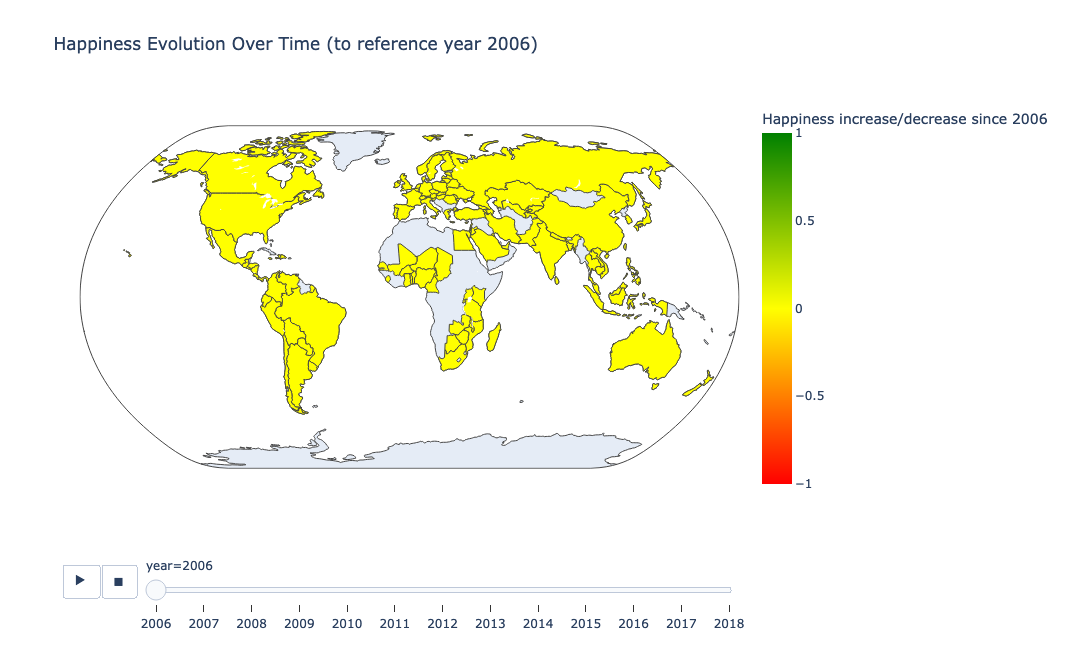

In [58]:
import plotly.express as px
import pandas as pd

# Create an animated choropleth map with Plotly
fig = px.choropleth(
    df_happiness,
    locations="country",
    locationmode="country names",
    color="happiness_score_delta_agg",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=custom_color_scale,
    projection="natural earth",
    title="Happiness Evolution Over Time (to reference year 2006)",
)

# Customize the color bar and legend range
fig.update_coloraxes(colorbar_title="Happiness increase/decrease since 2006", cmin=-1, cmax=1)  # Adjust the range as needed

# Adjust the figure size when displaying it
fig.update_layout(width=1300, height=650)  # Set the width and height of the figure

# Show the interactive animation
fig.show()

## Spider web

Available countries: ['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Botswana', 'Brazil', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Lebanon', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mexico', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Thailand', 'Tog

Enter the first country:  Nigeria
Enter the second country:  Estonia


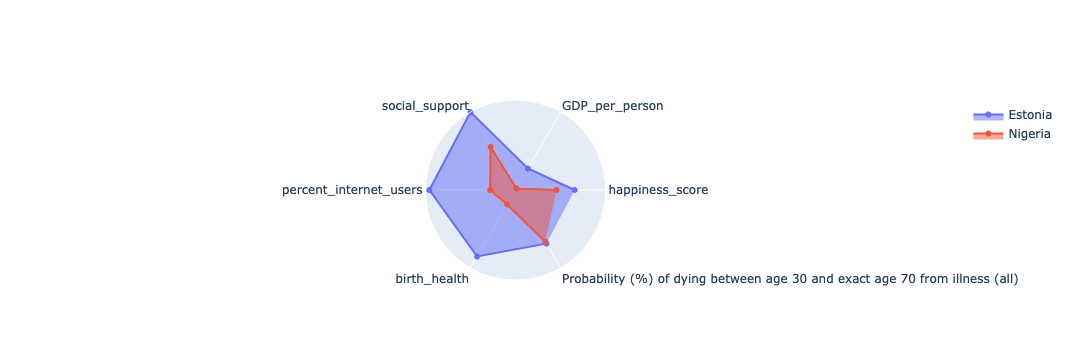

In [59]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

df_most_important_factors_filtered = df_most_important_factors[df_most_important_factors["year"] == 2018].copy()
df_most_important_factors_filtered = df_most_important_factors_filtered.reset_index(drop=True)
df_most_important_factors_filtered = df_most_important_factors_filtered.drop(columns='cluster')
df_most_important_factors_filtered = df_most_important_factors_filtered.drop(columns='outlier_check')
df_most_important_factors_filtered["Probability (%) of dying between age 30 and exact age 70 from illness (all)"] = 1 - df_most_important_factors_filtered["Probability (%) of dying between age 30 and exact age 70 from illness (all)"]


numeric_columns = df_most_important_factors_filtered.columns[1:]
scaler = MinMaxScaler()
df_most_important_factors_filtered[numeric_columns] = scaler.fit_transform(df_most_important_factors_filtered[numeric_columns])

def create_radar_chart(df, country1, country2):
    selected_countries = df[df['country'].isin([country1, country2])]
    
    fig = go.Figure()
    
    for _, row in selected_countries.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[2:],  # Select columns from the third onwards (attributes)
            theta=selected_countries.columns[2:],  # Select column names from the third onwards
            fill='toself',
            name=row['country']
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=False,
                range=[0, selected_countries.iloc[:, 2:].max().max()]  # Set the range based on your data
            )
        ),
        showlegend=True
    )

    fig.show()

if __name__ == '__main__':
    available_countries = df_most_important_factors_filtered['country'].unique().tolist()
    
    print("Available countries:", available_countries)
    
    country1 = input("Enter the first country: ")
    country2 = input("Enter the second country: ")
    
    if country1 in available_countries and country2 in available_countries:
        create_radar_chart(df_most_important_factors_filtered, country1, country2)
    else:
        print("Invalid country names. Please enter valid country names from the list.")


## UMAP

**Lateinamerika ist der größte Hersteller von Kokain**: daher so viele happy countries?

In [83]:
import plotly.subplots as sp

def plot_umap(umap_results, colors, cluster_colors, tooltips=None, subplot_titles=['UMAP by Happiness Score', 'UMAP by Cluster', 'Cluster Distribution by Regional Indicator'], k=3):
    
    def add_axis_lines(fig, umap_results, row, col):
        x_min, x_max = np.min(umap_results[:, 0]), np.max(umap_results[:, 0])
        y_min, y_max = np.min(umap_results[:, 1]), np.max(umap_results[:, 1])
        z_min, z_max = np.min(umap_results[:, 2]), np.max(umap_results[:, 2])

        # X-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_max], y=[y_min, y_min], z=[z_min, z_min], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

        # Y-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_min], y=[y_min, y_max], z=[z_min, z_min], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

        # Z-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_min], y=[y_min, y_min], z=[z_min, z_max], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

    k = 3
    fig = sp.make_subplots(rows=2, cols=2, subplot_titles=subplot_titles,
                           specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}], [{'type': 'bar', 'colspan': 2}, None]],
                           horizontal_spacing=0.1)
                           
    fig.update_layout(
        width=1800,  
        height=1200   
    )
    
################################################################### First subplot
    fig.add_trace(
        go.Scatter3d(
            x=umap_results[:, 0],
            y=umap_results[:, 1],
            z=umap_results[:, 2],
            mode='markers',
            showlegend=False,
            marker=dict(
                size=2,
                color=colors,
                colorscale='Viridis',
                opacity=1.,
                colorbar=dict(
                    title='Happiness Score',
                    x=0.35,#position colorbar
                    y=0.7,#position colorbar
                    len=0.5,
                )
            ),
            text=tooltips,
            hoverinfo='text'
        ), row=1, col=1)
    fig.update_layout(scene=dict(
    xaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 0]), 4))), # every 4th label for axis
    yaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 1]), 4))),
    zaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 2]), 4)))
))
    add_axis_lines(fig, umap_results, 1, 1)

    
############################### Second subplot
    labels = ["happiest", "second happiest",  "least happiest"]

    # Splitting the data by cluster and adding separate Scatter3d traces
    for cluster_label in range(k):
        mask = np.array(cluster_labels) == cluster_label
        fig.add_trace(
            go.Scatter3d(
                x=umap_results[mask, 0],
                y=umap_results[mask, 1],
                z=umap_results[mask, 2],
                mode='markers',
                marker=dict(
                    size=2,
                    color=cluster_colors[cluster_label],  # color for this specific cluster
                    opacity=1.,
                    
                    
                ),
                showlegend=False,
                name=labels[cluster_label],  # Legend label for this cluster
                text=np.array(tooltips)[mask],
                hoverinfo='text'
            ), row=1, col=2)

    regional_indicators = all_dataframes_combined['regional_indicator']

    cluster_distribution_df = pd.DataFrame(columns=[f'Cluster {i+1}' for i in range(k)])

    for cluster_label in range(k):
        cluster_distribution = []
        for region in regional_indicators.iloc[remaining_indices].unique():
            mask = (regional_indicators.iloc[remaining_indices] == region) & (cluster_labels == cluster_label)
            count = len(regional_indicators.iloc[remaining_indices][mask])
            cluster_distribution.append(count)
        cluster_distribution_df[f'Cluster {cluster_label+1}'] = cluster_distribution
        
    fig.update_layout(scene2=dict(
        xaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 0]), 4))),
        yaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 1]), 4))),
        zaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 2]), 4)))
    ))

    


    fig.data[1].name = "Clusters"  
    fig.data[1].showlegend = False
    fig.update_layout(legend=dict(itemsizing='constant', itemwidth=40))

    add_axis_lines(fig, umap_results, 1, 2)


############################### third subplot
    for cluster_label in range(k):
        fig.add_trace(go.Bar(
            x=regional_indicators.unique(),
            y=cluster_distribution_df[f'Cluster {cluster_label+1}'],
            name=labels[cluster_label],
            marker_color=['rgba(173, 216, 230, 1)',  # light blue
              'rgba(255, 182, 193, 1)',  # light pink
              'rgba(144, 238, 144, 1)',  # light green
][cluster_label]

        ), row=2, col=1)

    fig.update_layout(scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),

        
    ))

    fig.update_layout(
        width=1200,  # Increase figure width
        height=600,
        margin=dict(l=100, r=100, t=50, b=50, pad=4)  # Adjust the margins between subplots
    )



    fig.update_layout(scene2=dict(
        xaxis=dict(showgrid=False, backgroundcolor='white'),
        yaxis=dict(showgrid=False, backgroundcolor='white'),
        zaxis=dict(showgrid=False, backgroundcolor='white'),
        bgcolor='white'
    ))
    
    fig.update_layout(plot_bgcolor='white')
    fig.update_layout(margin=dict(l=150, r=150, t=50, b=50, pad=4))



    fig.show()
    
##########################################################################################################################################################################
    
df_t_umap = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)',
                                     'Suicides per 100000 (all)', 'social_support',
                                     'birth_health', 'freedom', 'generosity', 'perception_corruption',
                                     'government_confidence', 'percent_internet_users',
                                     'GDP_per_person', 'temperature_change']].copy()

scaler = StandardScaler()
df_t_umap_normalized = pd.DataFrame()

for column in df_t_umap.columns:
    column_values = df_t_umap[column].values.reshape(-1, 1)
    column_normalized = scaler.fit_transform(column_values)
    df_t_umap_normalized[column] = column_normalized.flatten()

##################################################################################################
from scipy import stats

umap_default = umap.UMAP(random_state=1, n_components=3, n_neighbors=10, min_dist=0.1)
umap_results = umap_default.fit_transform(df_t_umap_normalized.values)

z_scores = np.abs(stats.zscore(umap_results))

threshold = 2

# identify outliers
outliers = np.where(z_scores > threshold)


remaining_indices = np.delete(np.arange(len(umap_results)), outliers)

# Remove outliers
umap_results = np.delete(umap_results, outliers, axis=0)


k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
cluster_labels = kmeans.fit_predict(umap_results)




temp_df = pd.DataFrame({
    'happiness_score': all_dataframes_combined.iloc[remaining_indices]['happiness_score'],
    'cluster': cluster_labels
})

cluster_mean_happiness = temp_df.groupby('cluster')['happiness_score'].mean().to_dict()




sorted_clusters = sorted(cluster_mean_happiness, key=cluster_mean_happiness.get, reverse=True)

original_colors = ['rgba(173, 216, 230, 1)',  # light blue
                   'rgba(255, 182, 193, 1)',  # light pink
                   'rgba(144, 238, 144, 1)',  # light green
]
cluster_colors = [original_colors[i] for i in sorted_clusters]

plot_umap(umap_results, colors=all_dataframes_combined['happiness_score'].iloc[remaining_indices].tolist(), cluster_colors=cluster_colors,
          tooltips=all_dataframes_combined['country'].iloc[remaining_indices].tolist())


AttributeError: module 'umap' has no attribute 'UMAP'

In [84]:

import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.cluster import KMeans
import plotly.express as px

def plot_umap(umap_results, colors, cluster_colors, tooltips=None, subplot_titles=['UMAP by Happiness Score', 'UMAP by Cluster', 'Cluster Distribution by Regional Indicator'], k=3):
    region_colors = px.colors.qualitative.Plotly[:len(np.unique(regional_indicators[remaining_indices]))]
    region_to_color = dict(zip(np.unique(regional_indicators[remaining_indices]), region_colors))  # Defined here.

    def add_axis_lines(fig, umap_results, row, col):
        x_min, x_max = np.min(umap_results[:, 0]), np.max(umap_results[:, 0])
        y_min, y_max = np.min(umap_results[:, 1]), np.max(umap_results[:, 1])
        z_min, z_max = np.min(umap_results[:, 2]), np.max(umap_results[:, 2])

        # X-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_max], y=[y_min, y_min], z=[z_min, z_min], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

        # Y-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_min], y=[y_min, y_max], z=[z_min, z_min], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

        # Z-axis line
        fig.add_trace(go.Scatter3d(x=[x_min, x_min], y=[y_min, y_min], z=[z_min, z_max], mode='lines', line=dict(color='black'), showlegend=False), row=row, col=col)

    k = 3
    fig = sp.make_subplots(rows=2, cols=2, subplot_titles=subplot_titles,
                           specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}], [{'type': 'bar', 'colspan': 2}, None]],
                           horizontal_spacing=0.1)
                           
    fig.update_layout(
        width=1800,  
        height=1200   
    )
    
################################################################### First subplot
    fig.add_trace(
        go.Scatter3d(
            x=umap_results[:, 0],
            y=umap_results[:, 1],
            z=umap_results[:, 2],
            mode='markers',
            showlegend=False,
            marker=dict(
                size=2,
                color=colors,
                colorscale='Viridis',
                opacity=1.,
                colorbar=dict(
                    title='Happiness Score',
                    x=0.35,#position colorbar
                    y=0.7,#position colorbar
                    len=0.5,
                )
            ),
            text=tooltips,
            hoverinfo='text'
        ), row=1, col=1)
    fig.update_layout(scene=dict(
    xaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 0]), 4))), # every 4th label for axis
    yaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 1]), 4))),
    zaxis=dict(showbackground=False, tickvals=list(range(0, len(umap_results[:, 2]), 4)))
))
    add_axis_lines(fig, umap_results, 1, 1)


    ############################### Second subplot
    labels = ["happiest", "second happiest", "least happiest"]
    # Dummy traces for creating the "Clusters" legend
    for idx, label in enumerate(labels):
        fig.add_trace(
            go.Scatter3d(
                x=[None],
                y=[None],
                z=[None],
                mode='markers',
                marker=dict(
                    size=18,
                    color=cluster_colors[idx],
                    opacity=0
                ),
                showlegend=True,
                legendgroup="Clusters",
                name=label,
                hoverinfo='none'
            ), row=1, col=2)
    fig.update_layout(scene2=dict(
    xaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 0]), 4))),
    yaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 1]), 4))),
    zaxis=dict(showgrid=False, backgroundcolor='white', tickvals=list(range(0, len(umap_results[:, 2]), 4)))
    ))
    # Actual data for the second subplot
    for cluster_label in range(k):
        mask = np.array(cluster_labels) == cluster_label
        fig.add_trace(
            go.Scatter3d(
                x=umap_results[mask, 0],
                y=umap_results[mask, 1],
                z=umap_results[mask, 2],
                mode='markers',
                marker=dict(
                    size=2,  
                    color=cluster_colors[cluster_label],
                    opacity=1.
                ),
                showlegend=False,
                text=np.array(tooltips)[mask],
                hoverinfo='text'
            ), row=1, col=2)
    add_axis_lines(fig, umap_results, 1, 2)
    # Plotting bars for the third subplot
    for cluster_label in range(k):
        unique_regions = np.unique(regional_indicators[remaining_indices])
        for idx, region in enumerate(unique_regions):
            mask = (regional_indicators[remaining_indices] == region) & (cluster_labels == cluster_label)
            count = np.sum(mask)
            fig.add_trace(go.Bar(
                x=[labels[cluster_label]],
                y=[count],
                name=region,
                marker_color=region_to_color[region],
                showlegend=(cluster_label == 0)
            ), row=2, col=1)

    # Updating layout
    fig.update_layout(
        barmode='group',
        title='Distribution of clusters per region',
        xaxis_title='Cluster',
        yaxis_title='Count',
        width=1500,
        height=900,
        plot_bgcolor='white',
        legend=dict(
            title='',
            orientation='v',
            yanchor="top",
            y=.8,
            xanchor="right",
            x=1
        )
    )

    

    fig.show()
##########################################################################################################################################################################
    
df_t_umap = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)',
                                     'Suicides per 100000 (all)', 'social_support',
                                     'birth_health', 'freedom', 'generosity', 'perception_corruption',
                                     'government_confidence', 'percent_internet_users',
                                     'GDP_per_person', 'temperature_change']].copy()

scaler = StandardScaler()
df_t_umap_normalized = pd.DataFrame()

for column in df_t_umap.columns:
    column_values = df_t_umap[column].values.reshape(-1, 1)
    column_normalized = scaler.fit_transform(column_values)
    df_t_umap_normalized[column] = column_normalized.flatten()

##################################################################################################
from scipy import stats

umap_default = umap.UMAP(random_state=1, n_components=3, n_neighbors=10, min_dist=0.1)
umap_results = umap_default.fit_transform(df_t_umap_normalized.values)

z_scores = np.abs(stats.zscore(umap_results))

threshold = 2

# identify outliers
outliers = np.where(z_scores > threshold)


remaining_indices = np.delete(np.arange(len(umap_results)), outliers)

# Remove outliers
umap_results = np.delete(umap_results, outliers, axis=0)


k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
cluster_labels = kmeans.fit_predict(umap_results)




temp_df = pd.DataFrame({
    'happiness_score': all_dataframes_combined.iloc[remaining_indices]['happiness_score'],
    'cluster': cluster_labels
})

cluster_mean_happiness = temp_df.groupby('cluster')['happiness_score'].mean().to_dict()




sorted_clusters = sorted(cluster_mean_happiness, key=cluster_mean_happiness.get, reverse=True)

original_colors = ['rgba(173, 216, 230, 1)',  # light blue
                   'rgba(255, 182, 193, 1)',  # light pink
                   'rgba(144, 238, 144, 1)',  # light green
]
cluster_colors = [original_colors[i] for i in sorted_clusters]
regional_indicators = all_dataframes_combined['regional_indicator']
plot_umap(umap_results, colors=all_dataframes_combined['happiness_score'].iloc[remaining_indices].tolist(), cluster_colors=cluster_colors,
          tooltips=all_dataframes_combined['country'].iloc[remaining_indices].tolist())


AttributeError: module 'umap' has no attribute 'UMAP'

# Backup

## lineares model 

lineares model mit predictors die scheinbar linear relationship zu happiness_score haben

TODO: weitere columns für linear_relationship_to_happiness aussuchen (approx. linear)

In [85]:

linear_relationship_to_happiness = all_dataframes_combined[["Suicides per 100000 (all)", "percent_internet_users", "freedom"]]

y = all_dataframes_combined['happiness_score']




scaler = StandardScaler()

X_scaled = linear_relationship_to_happiness.copy()
for col in X_scaled.columns:
    X_scaled[col] = scaler.fit_transform(X_scaled[col].values.reshape(-1,1))
    
X_complete = X_scaled.dropna()
y_complete = y.loc[X_complete.index]


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Check p-values of the coefficients
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())
p_values = est2.pvalues

# Set the significance level
significance_level = 0.05

# Extract the names of significant predictors
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < significance_level]

# Print the significant predictors
print("Significant predictors:")
for predictor in significant_predictors:
    print(predictor)
    
    

R-squared: 0.4773005043610048
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     559.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):          1.31e-209
Time:                        18:00:05   Log-Likelihood:                -1045.8
No. Observations:                 956   AIC:                             2100.
Df Residuals:                     952   BIC:                             2119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

TODO: besserer plot für coeeficients und std errors

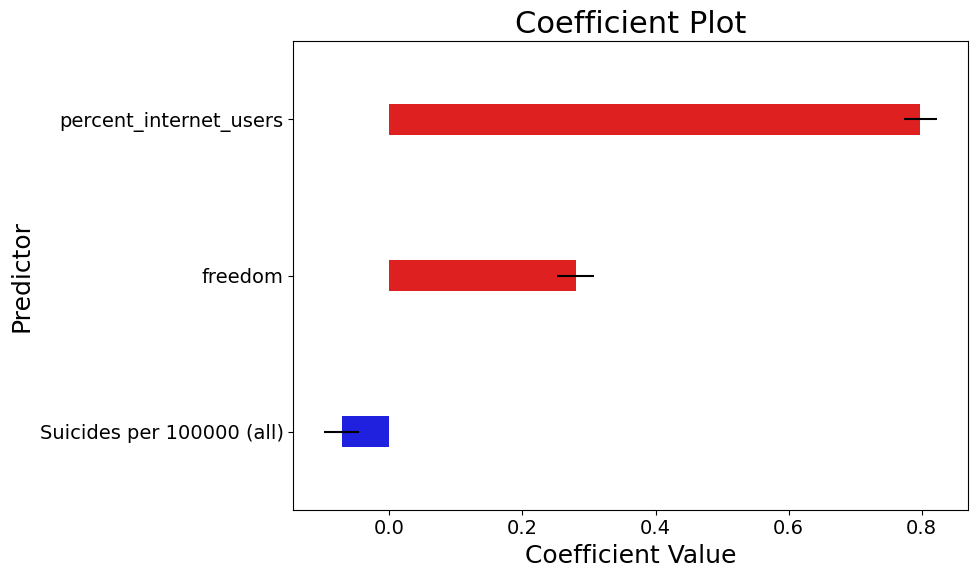

In [86]:
coef_values = None
coef_values = est2.params.values[1:]
std_errors = est2.bse.values[1:]
# Create a dataframe to store the coefficients, standard errors, and predictor names
coef_df = pd.DataFrame({'Predictor': linear_relationship_to_happiness.columns, 'Coefficient': coef_values, 'Std Error': std_errors})

sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

colors = ['red' if c > 0 else 'blue' for c in sorted_coef_df['Coefficient']]

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Predictor', data=sorted_coef_df, palette=colors, xerr=std_errors, width=0.2)
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.title('Coefficient Plot')
plt.tight_layout()
plt.show()

## Happiness evolution

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display

# Liste der eindeutigen Länder
unique_countries = df_most_important_factors['country'].unique()

# Funktion zur Erstellung der animierten Zeitreihenvisualisierung
def create_happiness_evolution_animation(country):
    plt.figure(figsize=(15, 7))
    data_country = df_most_important_factors[df_most_important_factors['country'] == country]
    sns.lineplot(x='year', y='happiness_score', data=data_country, marker='o')
    plt.title(f"Happiness Evolution in {country}")
    plt.xlabel("Year")
    plt.ylabel("Happiness Score")
    plt.ylim(0, 10)  # Setze die y-Achsenbegrenzung auf den Bereich der Happiness Score
    
# Interaktives Widget zur Auswahl des Landes
country_dropdown = widgets.Dropdown(options=unique_countries, description='Country:')
interact(create_happiness_evolution_animation, country=country_dropdown)

plt.show()

interactive(children=(Dropdown(description='Country:', options=('Argentina', 'Armenia', 'Australia', 'Austria'…